In [1]:
from funcs import *
% matplotlib inline

Using TensorFlow backend.


# Data

In [2]:
df = pd.read_excel('serieses.xlsx')

# US Federal effective rate

In [3]:
tf_ef_r = df.iloc[18, 1:].copy()
tf_ef_r.index = pd.DatetimeIndex(start='1954-07', end='2015-06', freq='M')

Results of Dickey-Fuller Test:
Test Statistic                  -2.682761
p-value                          0.077069
#Lags Used                      17.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (5%)             -2.865602
Critical Value (10%)            -2.568933
dtype: float64


Results of KPSS Test:
Test Statistic            0.797743
p-value                   0.010000
#Lags Used               20.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


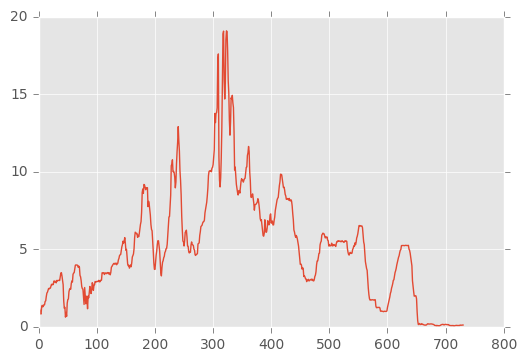

In [4]:
test_stationarity(tf_ef_r)

Results of Dickey-Fuller Test:
Test Statistic                -5.984594e+00
p-value                        1.804735e-07
#Lags Used                     1.800000e+01
Number of Observations Used    7.110000e+02
Critical Value (1%)           -3.439581e+00
Critical Value (5%)           -2.865614e+00
Critical Value (10%)          -2.568939e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.115789
p-value                   0.100000
#Lags Used               20.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


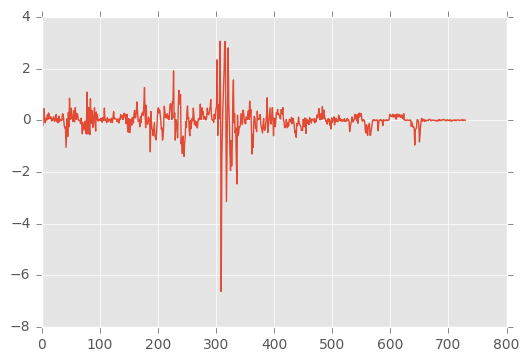

In [5]:
test_stationarity(diff_series(tf_ef_r))

In [8]:
train = tf_ef_r[:725]
test = tf_ef_r[725:]

In [9]:
len(test)

6

### ARIMA

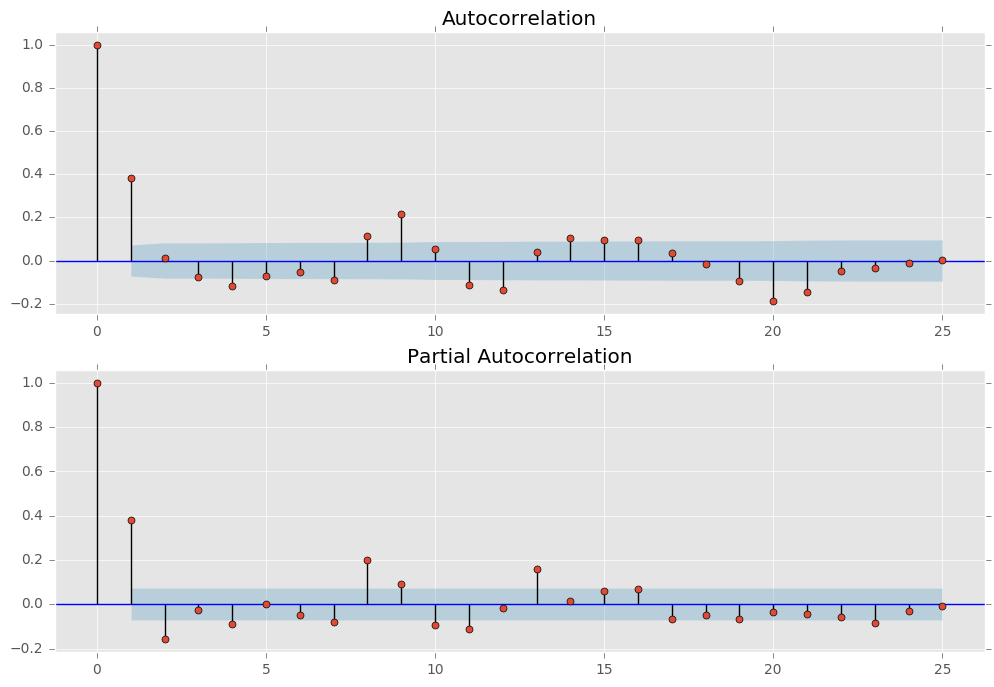

In [10]:
correlogram(diff_series(tf_ef_r))

In [11]:
model = ARIMA(np.array(train), order=(2,1,1)).fit(trend='nc')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  724
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -483.012
Method:                       css-mle   S.D. of innovations              0.471
Date:                Tue, 09 May 2017   AIC                            974.024
Time:                        03:06:05   BIC                            992.363
Sample:                             1   HQIC                           981.102
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.9107      0.161      5.669      0.000       0.596       1.226
ar.L2.D.y     -0.3279      0.058     -5.608      0.000      -0.442      -0.213
ma.L1.D.y     -0.4868      0.167     -2.909      0.0

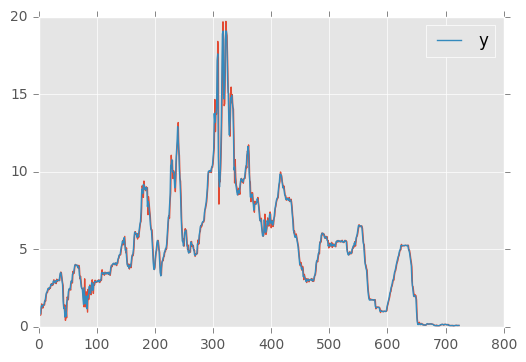

In [12]:
model.plot_predict()
plt.show()

In [13]:
forc_arima = model.forecast(len(test))

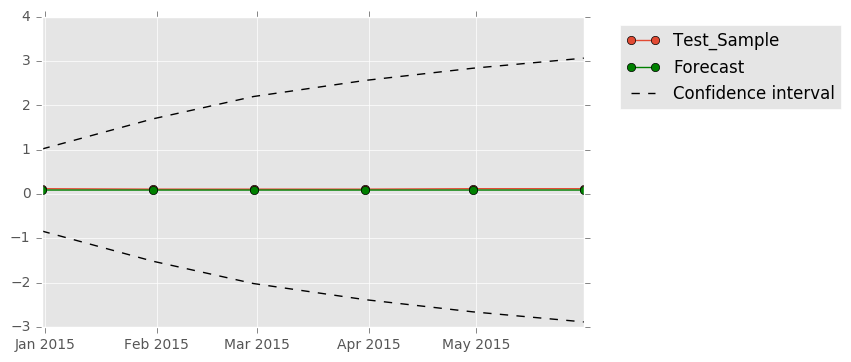

In [14]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.05,1))

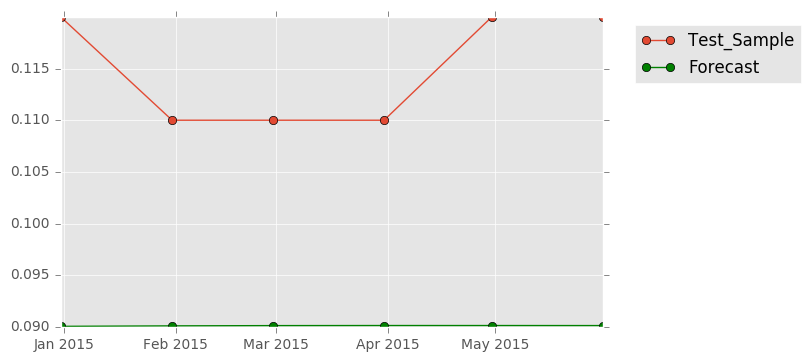

In [15]:
plot_forecast_out_only(test, forc_arima, conf_int=False, bbox_loc=(1.38,1))

In [16]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.024890069420781161,
 'MSE': 0.00064458986072529929,
 'RMSE': 0.025388774305296805}

### ANN

In [17]:
train_nn = create_df_for_nn(tf_ef_r, 2).loc[:'2014-09-30', :]

In [18]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [19]:
nn = assemble_model(2)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 17.1292
Epoch 2/100
0s - loss: 12.1007
Epoch 3/100
0s - loss: 11.0386
Epoch 4/100
0s - loss: 9.8379
Epoch 5/100
0s - loss: 8.4999
Epoch 6/100
0s - loss: 7.2611
Epoch 7/100
0s - loss: 6.1541
Epoch 8/100
0s - loss: 5.8513
Epoch 9/100
0s - loss: 5.2893
Epoch 10/100
1s - loss: 4.8884
Epoch 11/100
1s - loss: 4.1306
Epoch 12/100
0s - loss: 3.8481
Epoch 13/100
0s - loss: 4.3315
Epoch 14/100
0s - loss: 3.6874
Epoch 15/100
0s - loss: 3.6532
Epoch 16/100
1s - loss: 3.3861
Epoch 17/100
1s - loss: 3.3983
Epoch 18/100
0s - loss: 3.0705
Epoch 19/100
0s - loss: 2.8047
Epoch 20/100
0s - loss: 2.8744
Epoch 21/100
1s - loss: 2.7938
Epoch 22/100
1s - loss: 2.2663
Epoch 23/100
0s - loss: 2.3132
Epoch 24/100
0s - loss: 2.3330
Epoch 25/100
1s - loss: 2.4465
Epoch 26/100
1s - loss: 2.2125
Epoch 27/100
0s - loss: 2.0760
Epoch 28/100
0s - loss: 2.1569
Epoch 29/100
1s - loss: 2.7419
Epoch 30/100
0s - loss: 2.3305
Epoch 31/100
0s - loss: 2.4380
Epoch 32/100
0s - loss: 2.0871
Epoch 33/100
1

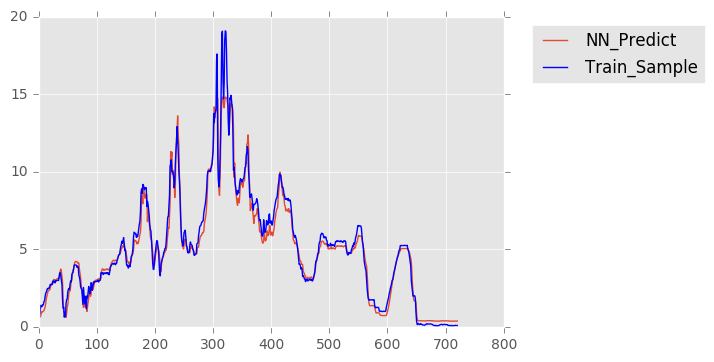

In [20]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [21]:
nn_forecast = nn_predict_series(nn, train_nn.iloc[-1:, 1:], len(test))

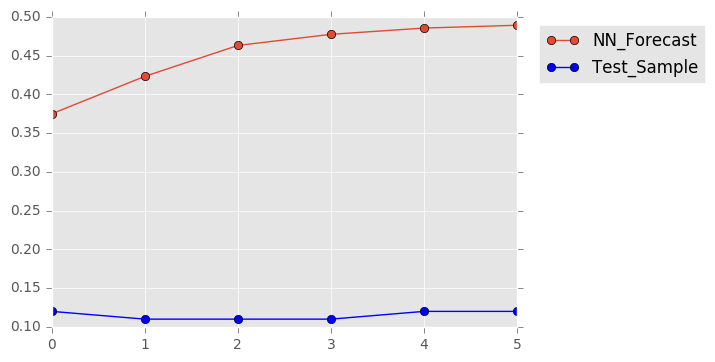

In [22]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.03, 1))

In [23]:
errors_out_sample(test, nn_forecast)

{'MAE': 0.33727614045143128,
 'MSE': 0.11547634086405716,
 'RMSE': 0.33981809967106985}

### Hybrid

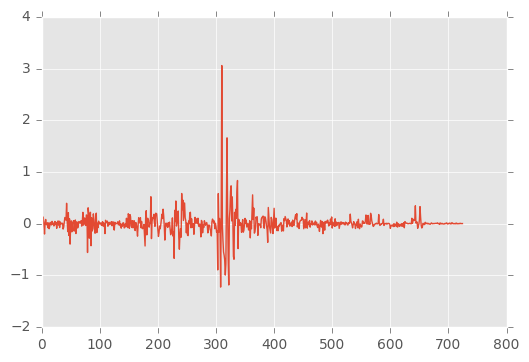

In [24]:
resids_arima = get_resids_arima(train, model)
plt.plot(resids_arima)
plt.show()

In [25]:
lags_nn = 4

df_nn_resid = create_df_for_nn_residuals(resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [26]:
nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.0455
Epoch 2/100
0s - loss: 0.0447
Epoch 3/100
0s - loss: 0.0448
Epoch 4/100
0s - loss: 0.0439
Epoch 5/100
0s - loss: 0.0434
Epoch 6/100
0s - loss: 0.0432
Epoch 7/100
0s - loss: 0.0434
Epoch 8/100
0s - loss: 0.0429
Epoch 9/100
0s - loss: 0.0430
Epoch 10/100
0s - loss: 0.0425
Epoch 11/100
0s - loss: 0.0423
Epoch 12/100
0s - loss: 0.0422
Epoch 13/100
0s - loss: 0.0419
Epoch 14/100
0s - loss: 0.0426
Epoch 15/100
0s - loss: 0.0423
Epoch 16/100
0s - loss: 0.0421
Epoch 17/100
0s - loss: 0.0415
Epoch 18/100
0s - loss: 0.0420
Epoch 19/100
0s - loss: 0.0420
Epoch 20/100
1s - loss: 0.0421
Epoch 21/100
1s - loss: 0.0418
Epoch 22/100
0s - loss: 0.0420
Epoch 23/100
0s - loss: 0.0420
Epoch 24/100
1s - loss: 0.0421
Epoch 25/100
1s - loss: 0.0414
Epoch 26/100
1s - loss: 0.0418
Epoch 27/100
1s - loss: 0.0417
Epoch 28/100
1s - loss: 0.0425
Epoch 29/100
1s - loss: 0.0416
Epoch 30/100
0s - loss: 0.0417
Epoch 31/100
0s - loss: 0.0419
Epoch 32/100
0s - loss: 0.0418
Epoch 33/100
0s -

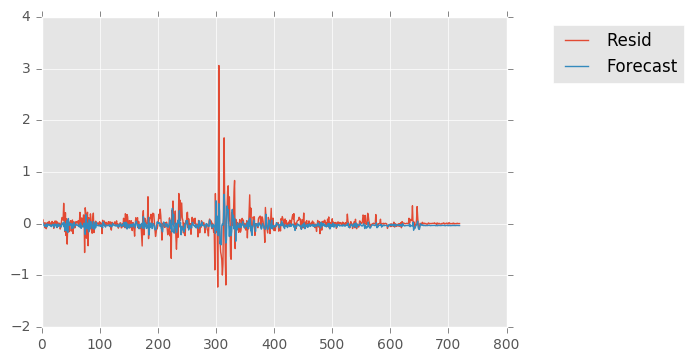

In [27]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.4,1), loc='best')
plt.show()

In [28]:
nn_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

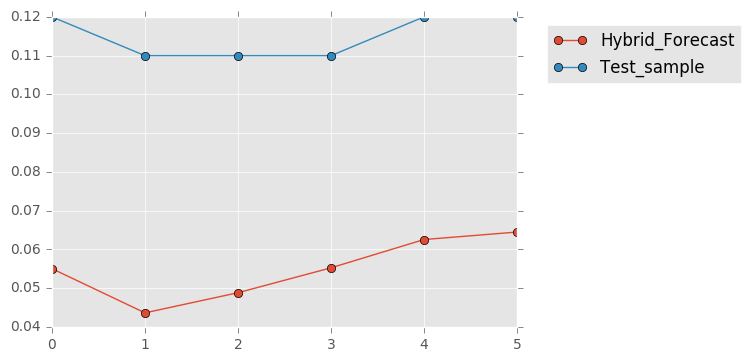

In [29]:
hybrid_plot_forecast(forc_arima, nn_resid_forecast, test)

In [30]:
hybrid_forecast = hybrid_predict_series(forc_arima, nn_resid_forecast)

In [31]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 0.06004541541700207,
 'MSE': 0.0036255892764840958,
 'RMSE': 0.060212866369938708}

---

---

---

# RU Real GDP Pure

In [32]:
ru_gdp = df.iloc[11, 1:87].copy()
ru_gdp.index = pd.DatetimeIndex(start='1995-01', end='2016-07', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                 -0.775266
p-value                         0.826280
#Lags Used                      1.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


Results of KPSS Test:
Test Statistic            0.724840
p-value                   0.011287
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


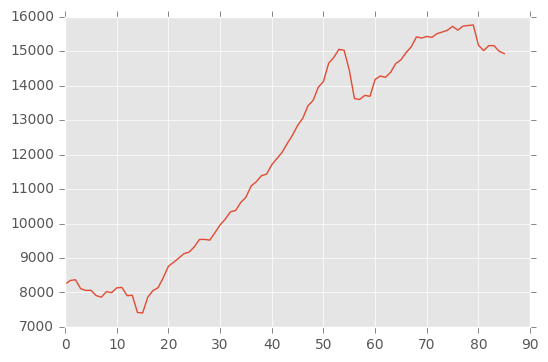

In [33]:
test_stationarity(ru_gdp)

Results of Dickey-Fuller Test:
Test Statistic                -5.828238e+00
p-value                        4.031817e-07
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.168208
p-value                   0.100000
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


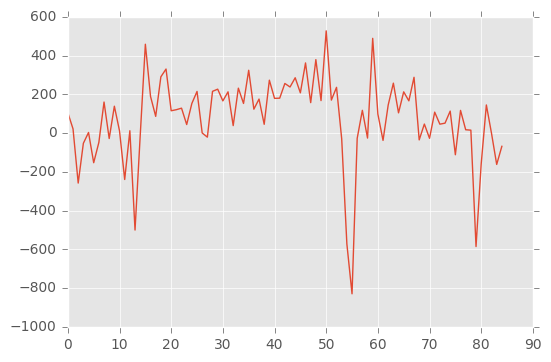

In [34]:
test_stationarity(diff_series(ru_gdp))

In [35]:
train = ru_gdp[:-6]
test = ru_gdp[-6:]

### ARIMA

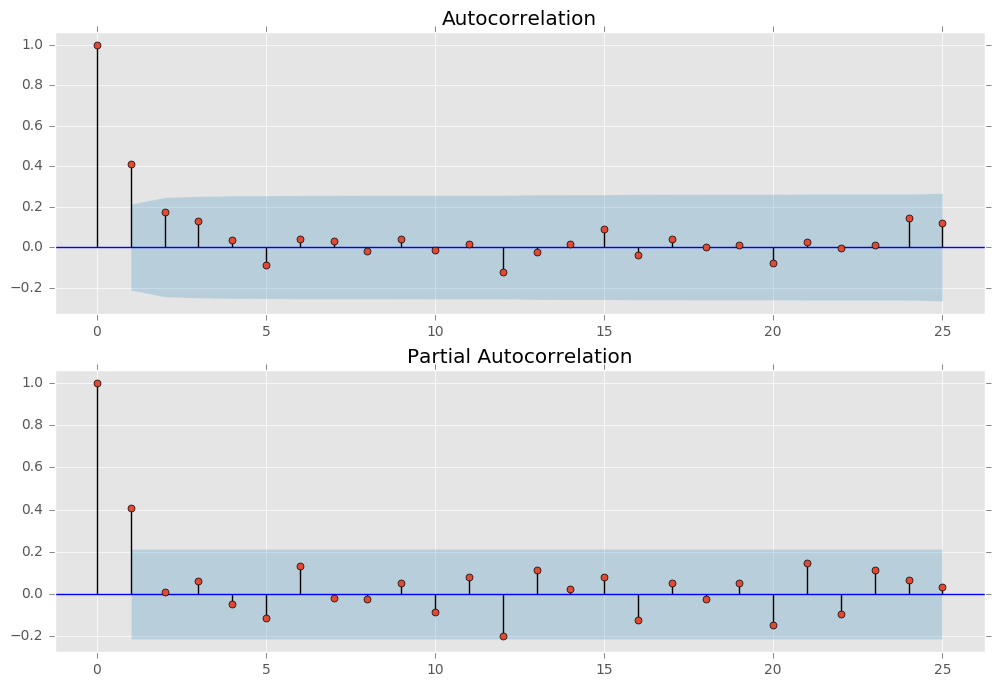

In [36]:
correlogram(diff_series(ru_gdp))

In [37]:
arima_model = ARIMA(np.array(train), order=(2,1,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   79
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -525.560
Method:                       css-mle   S.D. of innovations            185.683
Date:                Tue, 09 May 2017   AIC                           1061.119
Time:                        03:11:07   BIC                           1072.967
Sample:                             1   HQIC                          1065.866
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.6025     16.553      6.440      0.000      74.160     139.045
ar.L1.D.y      1.3810      0.100     13.760      0.000       1.184       1.578
ar.L2.D.y     -0.4216      0.102     -4.118      0.0

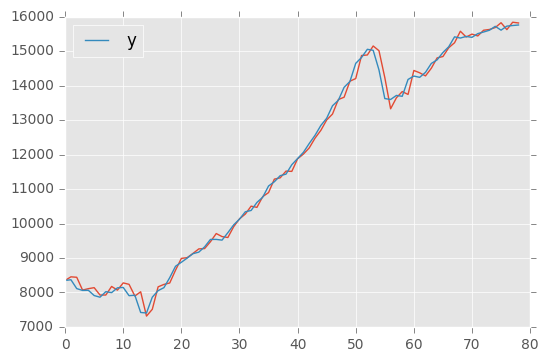

In [38]:
arima_model.plot_predict()
plt.show()

In [39]:
forc_arima = arima_model.forecast(len(test))

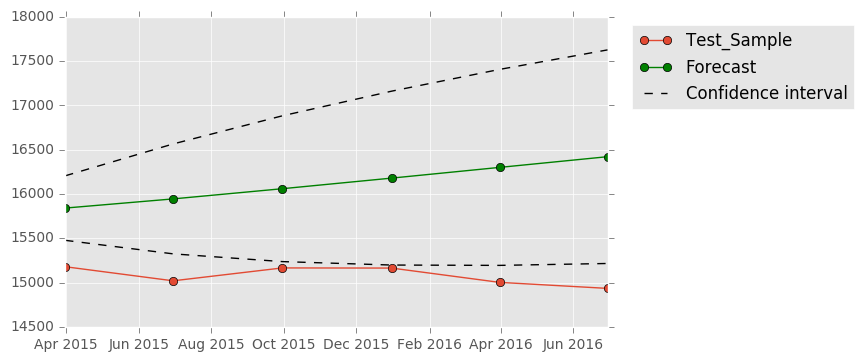

In [40]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

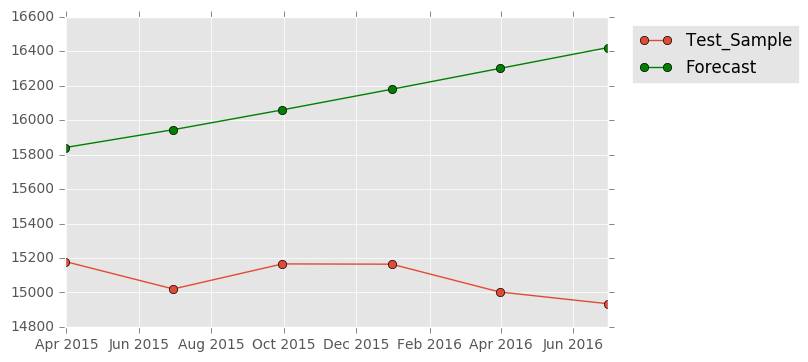

In [41]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1), conf_int=False)

In [42]:
errors_out_sample(test, forc_arima[0])

{'MAE': 1047.0037871004979,
 'MSE': 1170248.7819305155,
 'RMSE': 1081.7803760147046}

### ANN

In [43]:
mean = train.mean()
z = train.max() - train.min()
scaled_train = train.copy()

In [44]:
scaled_train = (scaled_train-mean)/z

In [45]:
lags_for_nn = 2

In [46]:
train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [47]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [48]:
nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=150, 
       verbose=2,
       batch_size=1)

Epoch 1/150
0s - loss: 0.1270
Epoch 2/150
0s - loss: 0.1185
Epoch 3/150
0s - loss: 0.1171
Epoch 4/150
0s - loss: 0.1139
Epoch 5/150
0s - loss: 0.1108
Epoch 6/150
0s - loss: 0.1052
Epoch 7/150
0s - loss: 0.0984
Epoch 8/150
0s - loss: 0.0911
Epoch 9/150
0s - loss: 0.0811
Epoch 10/150
0s - loss: 0.0703
Epoch 11/150
0s - loss: 0.0579
Epoch 12/150
0s - loss: 0.0456
Epoch 13/150
0s - loss: 0.0313
Epoch 14/150
0s - loss: 0.0212
Epoch 15/150
0s - loss: 0.0120
Epoch 16/150
0s - loss: 0.0065
Epoch 17/150
0s - loss: 0.0035
Epoch 18/150
0s - loss: 0.0021
Epoch 19/150
0s - loss: 0.0015
Epoch 20/150
0s - loss: 0.0014
Epoch 21/150
0s - loss: 0.0012
Epoch 22/150
0s - loss: 0.0013
Epoch 23/150
0s - loss: 0.0013
Epoch 24/150
0s - loss: 0.0012
Epoch 25/150
0s - loss: 0.0013
Epoch 26/150
0s - loss: 0.0013
Epoch 27/150
0s - loss: 0.0013
Epoch 28/150
0s - loss: 0.0013
Epoch 29/150
0s - loss: 0.0012
Epoch 30/150
0s - loss: 0.0012
Epoch 31/150
0s - loss: 0.0013
Epoch 32/150
0s - loss: 0.0013
Epoch 33/150
0s -

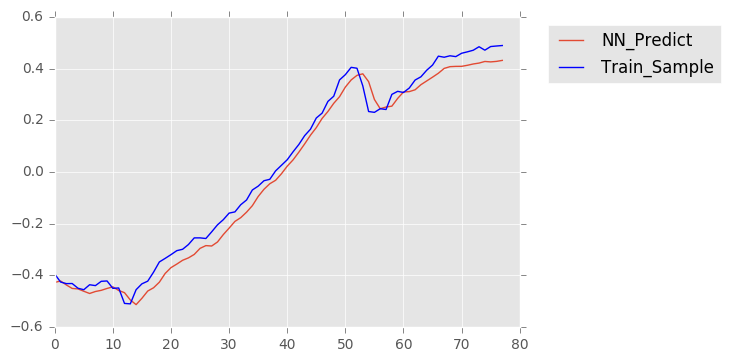

In [49]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

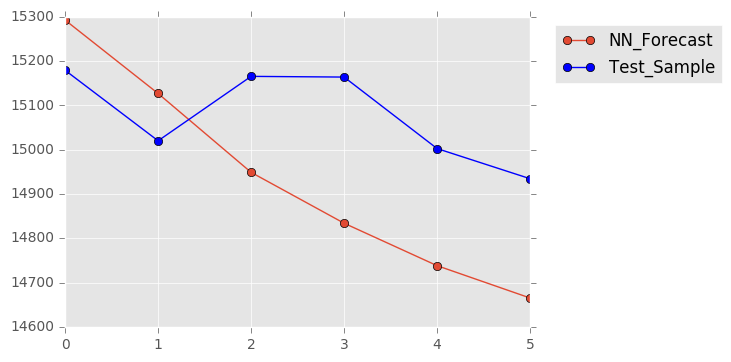

In [50]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

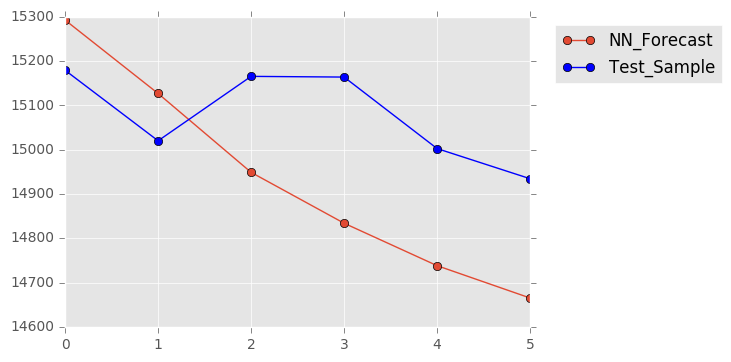

In [51]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

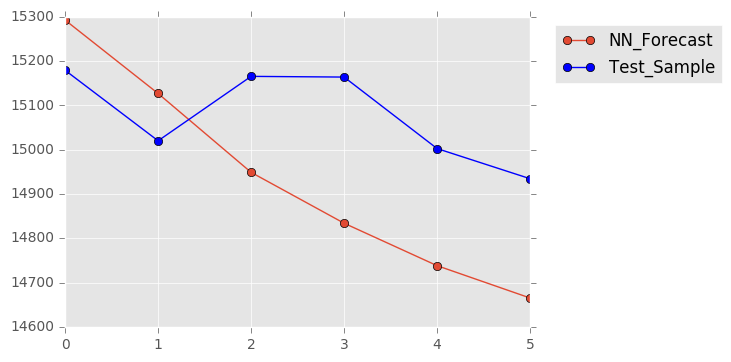

In [52]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

#### WIth Dropout

In [53]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [54]:
nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=150, 
       verbose=2,
       batch_size=1)

Epoch 1/150
0s - loss: 0.3919
Epoch 2/150
0s - loss: 0.1758
Epoch 3/150
0s - loss: 0.1480
Epoch 4/150
0s - loss: 0.1388
Epoch 5/150
0s - loss: 0.1409
Epoch 6/150
0s - loss: 0.1361
Epoch 7/150
0s - loss: 0.1303
Epoch 8/150
0s - loss: 0.1322
Epoch 9/150
0s - loss: 0.1246
Epoch 10/150
0s - loss: 0.1306
Epoch 11/150
0s - loss: 0.1223
Epoch 12/150
0s - loss: 0.1291
Epoch 13/150
0s - loss: 0.1313
Epoch 14/150
0s - loss: 0.1209
Epoch 15/150
0s - loss: 0.1223
Epoch 16/150
0s - loss: 0.1148
Epoch 17/150
0s - loss: 0.1222
Epoch 18/150
0s - loss: 0.1336
Epoch 19/150
0s - loss: 0.1255
Epoch 20/150
0s - loss: 0.1206
Epoch 21/150
0s - loss: 0.1216
Epoch 22/150
0s - loss: 0.1157
Epoch 23/150
0s - loss: 0.1181
Epoch 24/150
0s - loss: 0.1252
Epoch 25/150
0s - loss: 0.1117
Epoch 26/150
0s - loss: 0.1163
Epoch 27/150
0s - loss: 0.1211
Epoch 28/150
0s - loss: 0.1254
Epoch 29/150
0s - loss: 0.1081
Epoch 30/150
0s - loss: 0.1026
Epoch 31/150
0s - loss: 0.1080
Epoch 32/150
0s - loss: 0.1070
Epoch 33/150
0s -

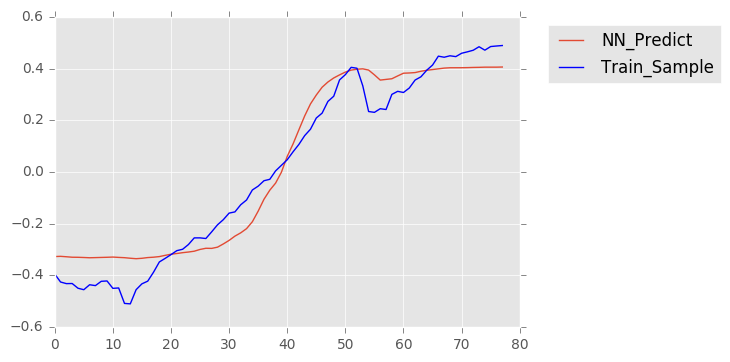

In [55]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [56]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean

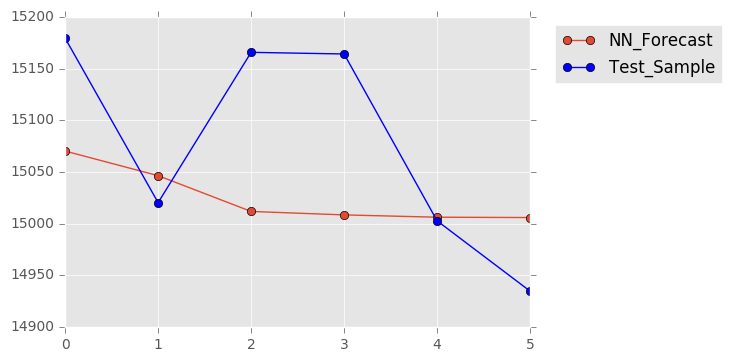

In [57]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [58]:
errors_out_sample(test, nn_forecast)

{'MAE': 86.64016683398313,
 'MSE': 10944.518086798571,
 'RMSE': 104.61605080865255}

### Hybrid

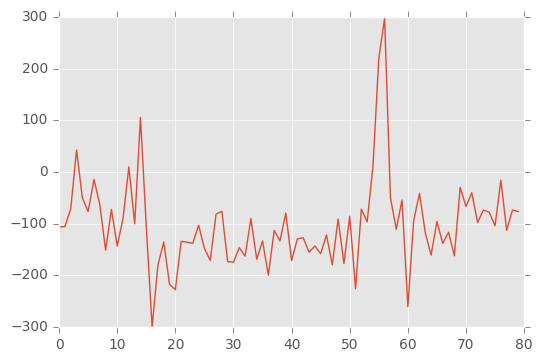

In [59]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [60]:
scaled_resids_arima = scaler(resids_arima)[0]

In [61]:
lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [62]:
nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.5141
Epoch 2/100
0s - loss: 0.0471
Epoch 3/100
0s - loss: 0.0226
Epoch 4/100
0s - loss: 0.0222
Epoch 5/100
0s - loss: 0.0223
Epoch 6/100
0s - loss: 0.0226
Epoch 7/100
0s - loss: 0.0225
Epoch 8/100
0s - loss: 0.0223
Epoch 9/100
0s - loss: 0.0226
Epoch 10/100
0s - loss: 0.0225
Epoch 11/100
0s - loss: 0.0221
Epoch 12/100
0s - loss: 0.0222
Epoch 13/100
0s - loss: 0.0222
Epoch 14/100
0s - loss: 0.0222
Epoch 15/100
0s - loss: 0.0231
Epoch 16/100
0s - loss: 0.0225
Epoch 17/100
0s - loss: 0.0220
Epoch 18/100
0s - loss: 0.0227
Epoch 19/100
0s - loss: 0.0223
Epoch 20/100
0s - loss: 0.0223
Epoch 21/100
0s - loss: 0.0222
Epoch 22/100
0s - loss: 0.0221
Epoch 23/100
0s - loss: 0.0217
Epoch 24/100
0s - loss: 0.0217
Epoch 25/100
0s - loss: 0.0224
Epoch 26/100
0s - loss: 0.0234
Epoch 27/100
0s - loss: 0.0219
Epoch 28/100
0s - loss: 0.0219
Epoch 29/100
0s - loss: 0.0219
Epoch 30/100
0s - loss: 0.0233
Epoch 31/100
0s - loss: 0.0221
Epoch 32/100
0s - loss: 0.0217
Epoch 33/100
0s -

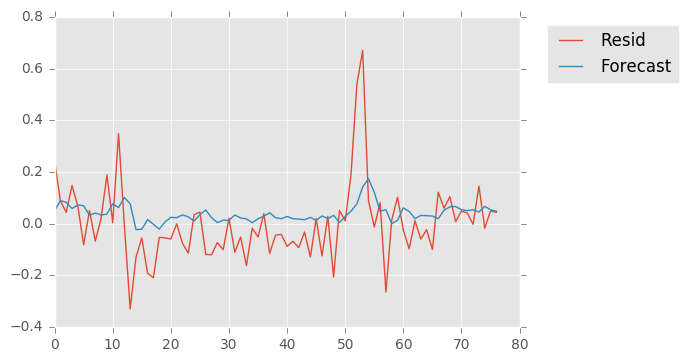

In [63]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [64]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

In [65]:
nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

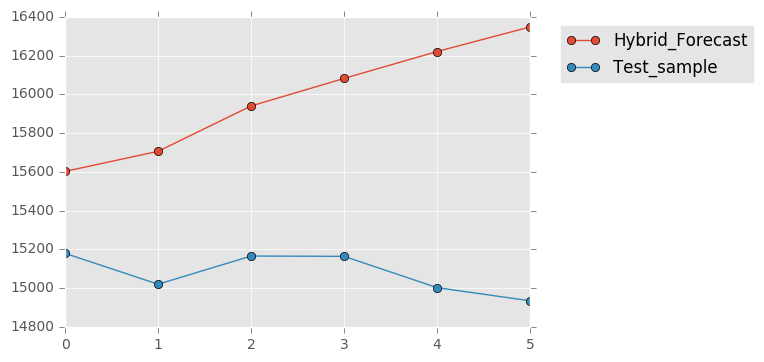

In [66]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [67]:
hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

In [68]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 905.72600084561509,
 'MSE': 929405.39194754616,
 'RMSE': 964.05673689236062}

In [69]:
nn_resids_forecast

array([-238.80056763, -238.80056763, -119.91175842,  -97.23365784,
        -79.39089966,  -73.52926636], dtype=float32)

---

---

---

# RU Export Pure

In [70]:
ru_exp = df.iloc[13, 1:87].copy()
ru_exp.index = pd.DatetimeIndex(start='1995-01', end='2016-07', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                 -0.903524
p-value                         0.786810
#Lags Used                      2.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


Results of KPSS Test:
Test Statistic            0.738559
p-value                   0.010040
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


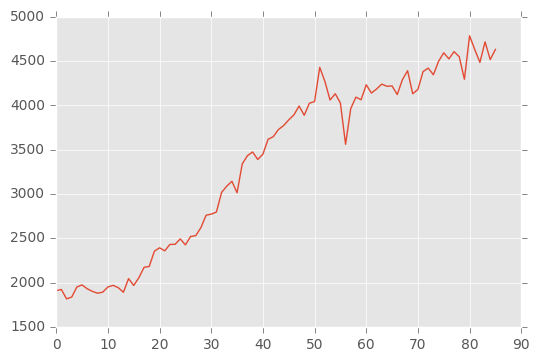

In [71]:
test_stationarity(ru_exp)

Results of Dickey-Fuller Test:
Test Statistic                -1.024904e+01
p-value                        4.536603e-18
#Lags Used                     1.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.153264
p-value                   0.100000
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


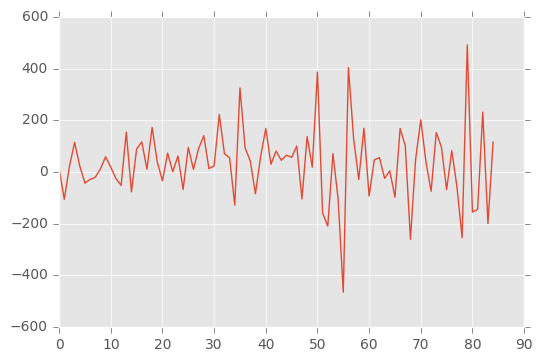

In [72]:
test_stationarity(diff_series(ru_exp))

In [73]:
train = ru_exp[:-6]
test = ru_exp[-6:]

### ARIMA

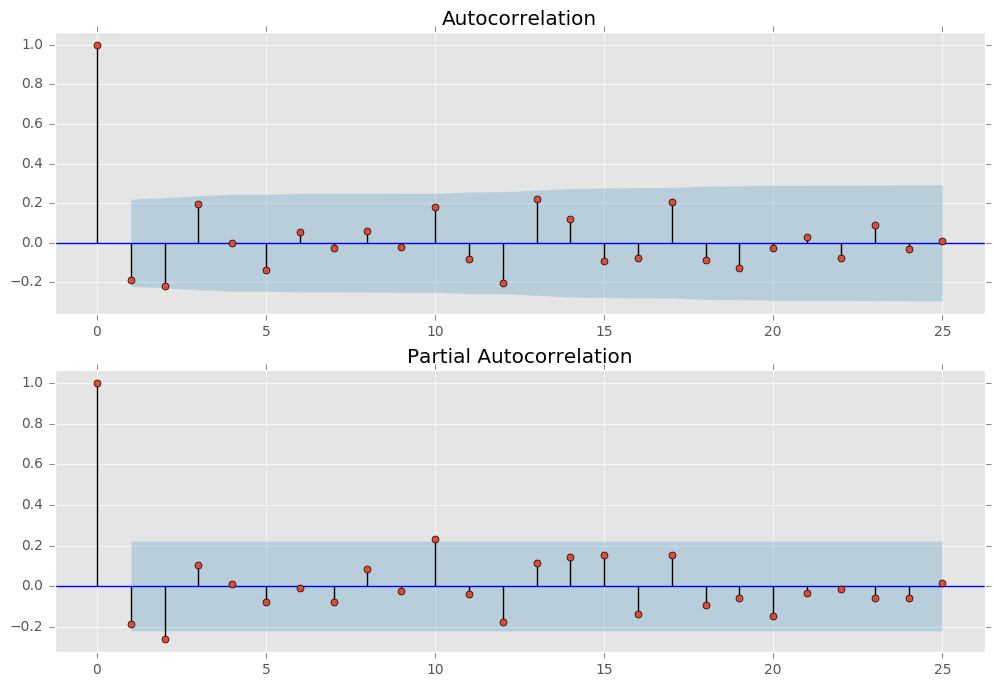

In [74]:
correlogram(diff_series(train))

In [75]:
arima_model = ARIMA(np.array(train), order=(0,1,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   79
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -494.150
Method:                       css-mle   S.D. of innovations            125.898
Date:                Tue, 09 May 2017   AIC                            994.300
Time:                        03:12:05   BIC                           1001.409
Sample:                             1   HQIC                           997.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6850      9.801      3.233      0.002      12.476      50.894
ma.L1.D.y     -0.3138      0.124     -2.533      0.013      -0.557      -0.071
                                    Roots           

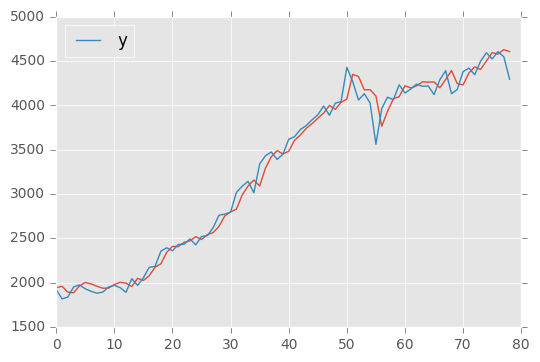

In [76]:
arima_model.plot_predict()
plt.show()

In [77]:
forc_arima = arima_model.forecast(len(test))

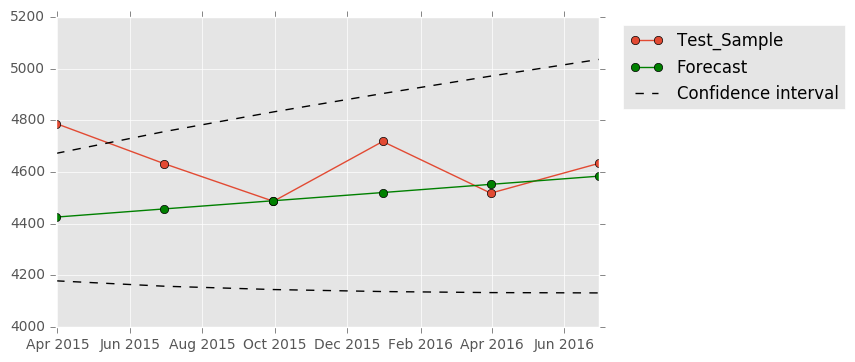

In [78]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [79]:
errors_out_sample(test, forc_arima[0])

{'MAE': 136.70949738045996,
 'MSE': 34051.153041182712,
 'RMSE': 184.52954517145136}

### ANN

In [80]:
scaled_train = scaler(train)[0]

In [81]:
lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [82]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [83]:
nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.4022
Epoch 2/100
0s - loss: 0.1447
Epoch 3/100
0s - loss: 0.1280
Epoch 4/100
0s - loss: 0.1210
Epoch 5/100
0s - loss: 0.1052
Epoch 6/100
0s - loss: 0.1234
Epoch 7/100
0s - loss: 0.0965
Epoch 8/100
0s - loss: 0.1095
Epoch 9/100
0s - loss: 0.1012
Epoch 10/100
0s - loss: 0.0943
Epoch 11/100
0s - loss: 0.0936
Epoch 12/100
0s - loss: 0.0963
Epoch 13/100
0s - loss: 0.0881
Epoch 14/100
0s - loss: 0.0720
Epoch 15/100
0s - loss: 0.0939
Epoch 16/100
0s - loss: 0.0925
Epoch 17/100
0s - loss: 0.0812
Epoch 18/100
0s - loss: 0.0756
Epoch 19/100
0s - loss: 0.0848
Epoch 20/100
0s - loss: 0.0903
Epoch 21/100
0s - loss: 0.0731
Epoch 22/100
0s - loss: 0.0885
Epoch 23/100
0s - loss: 0.0568
Epoch 24/100
0s - loss: 0.0615
Epoch 25/100
0s - loss: 0.0678
Epoch 26/100
0s - loss: 0.0643
Epoch 27/100
0s - loss: 0.0729
Epoch 28/100
0s - loss: 0.0625
Epoch 29/100
0s - loss: 0.0699
Epoch 30/100
0s - loss: 0.0708
Epoch 31/100
0s - loss: 0.0507
Epoch 32/100
0s - loss: 0.0628
Epoch 33/100
0s -

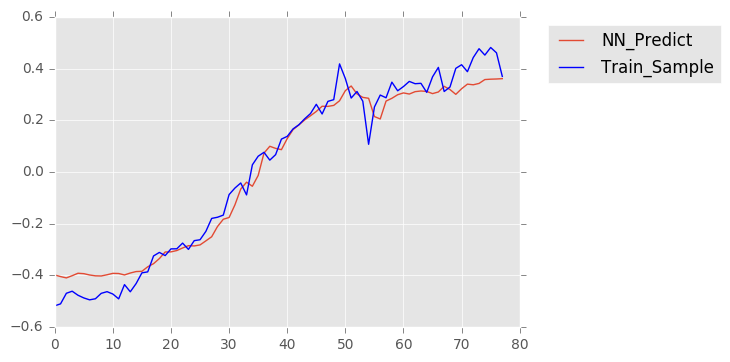

In [84]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [85]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

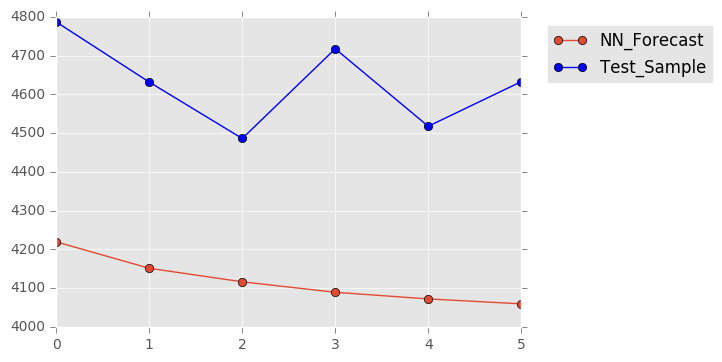

In [86]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [87]:
errors_out_sample(test, nn_forecast)

{'MAE': 510.87077974465001,
 'MSE': 268656.32843710441,
 'RMSE': 518.32068108180329}

### Hybrid

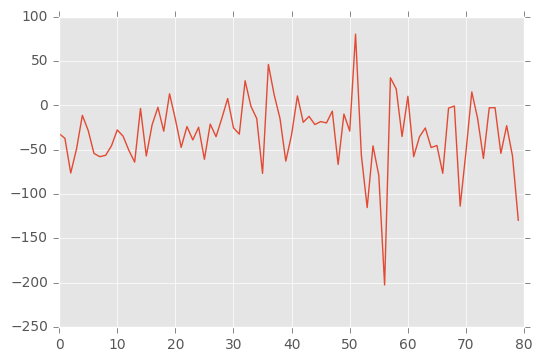

In [88]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [89]:
scaled_resids_arima = scaler(resids_arima)[0]

In [90]:
lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [91]:
nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0226
Epoch 2/100
0s - loss: 0.0212
Epoch 3/100
0s - loss: 0.0209
Epoch 4/100
0s - loss: 0.0209
Epoch 5/100
0s - loss: 0.0199
Epoch 6/100
0s - loss: 0.0204
Epoch 7/100
0s - loss: 0.0212
Epoch 8/100
0s - loss: 0.0210
Epoch 9/100
0s - loss: 0.0203
Epoch 10/100
0s - loss: 0.0206
Epoch 11/100
0s - loss: 0.0214
Epoch 12/100
0s - loss: 0.0203
Epoch 13/100
0s - loss: 0.0211
Epoch 14/100
0s - loss: 0.0203
Epoch 15/100
0s - loss: 0.0208
Epoch 16/100
0s - loss: 0.0204
Epoch 17/100
0s - loss: 0.0206
Epoch 18/100
0s - loss: 0.0203
Epoch 19/100
0s - loss: 0.0197
Epoch 20/100
0s - loss: 0.0205
Epoch 21/100
0s - loss: 0.0208
Epoch 22/100
0s - loss: 0.0207
Epoch 23/100
0s - loss: 0.0205
Epoch 24/100
0s - loss: 0.0201
Epoch 25/100
0s - loss: 0.0202
Epoch 26/100
0s - loss: 0.0205
Epoch 27/100
0s - loss: 0.0195
Epoch 28/100
0s - loss: 0.0209
Epoch 29/100
0s - loss: 0.0209
Epoch 30/100
0s - loss: 0.0202
Epoch 31/100
0s - loss: 0.0204
Epoch 32/100
0s - loss: 0.0201
Epoch 33/100
0s -

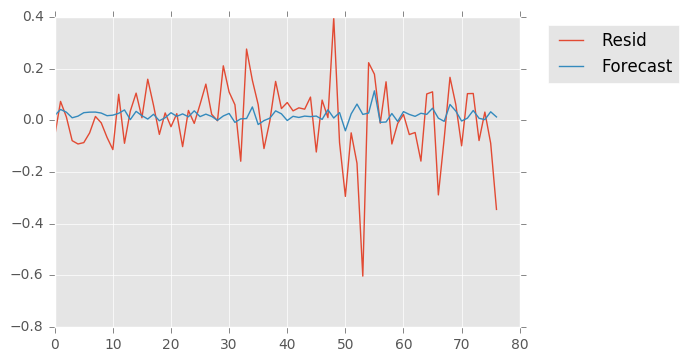

In [92]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [93]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

In [94]:
nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

In [95]:
hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

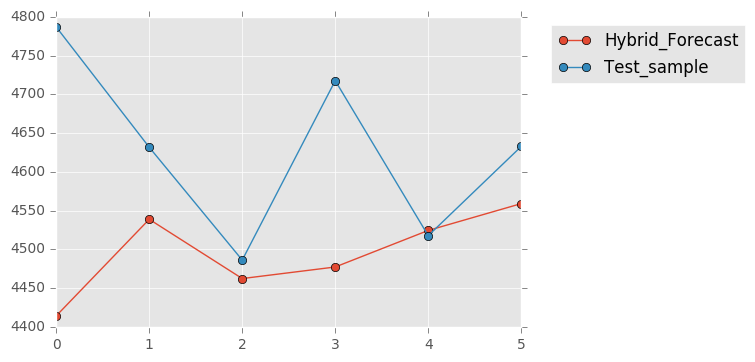

In [96]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [97]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 135.05948818348256,
 'MSE': 35232.025716952739,
 'RMSE': 187.70195981116643}

---

---

---

# Government consumption expenditures and gross investment

In [98]:
gov_consump_inv = df.iloc[32, 1:186].copy()
gov_consump_inv.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   0.619421
p-value                          0.988085
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


Results of KPSS Test:
Test Statistic            1.281905
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


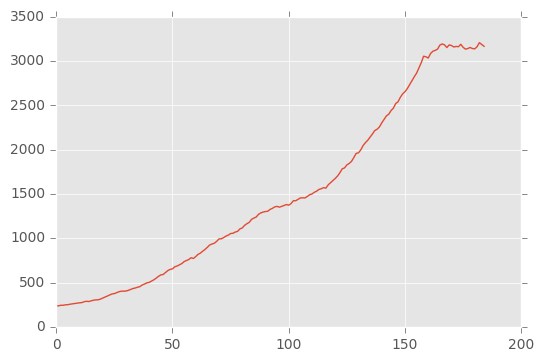

In [99]:
test_stationarity(gov_consump_inv)

Results of Dickey-Fuller Test:
Test Statistic                  -2.785001
p-value                          0.060448
#Lags Used                      13.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


Results of KPSS Test:
Test Statistic            0.335988
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


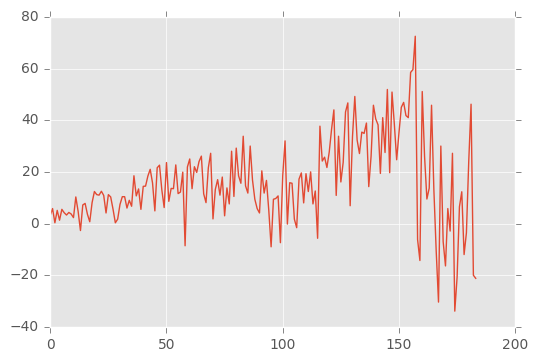

In [100]:
test_stationarity(diff_series(gov_consump_inv))

Results of Dickey-Fuller Test:
Test Statistic                -8.139737e+00
p-value                        1.035898e-12
#Lags Used                     6.000000e+00
Number of Observations Used    1.760000e+02
Critical Value (1%)           -3.468062e+00
Critical Value (5%)           -2.878106e+00
Critical Value (10%)          -2.575602e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.164808
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


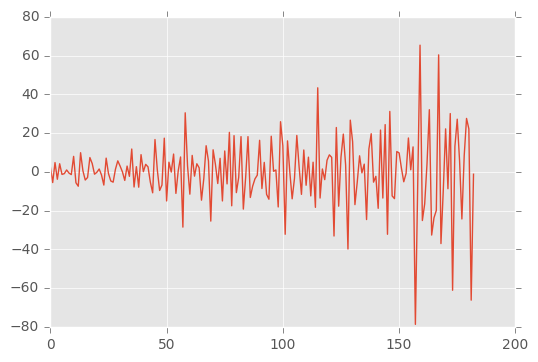

In [101]:
test_stationarity(diff_series(diff_series(gov_consump_inv)))

In [102]:
train = gov_consump_inv[:-6]
test = gov_consump_inv[-6:]

### ARIMA

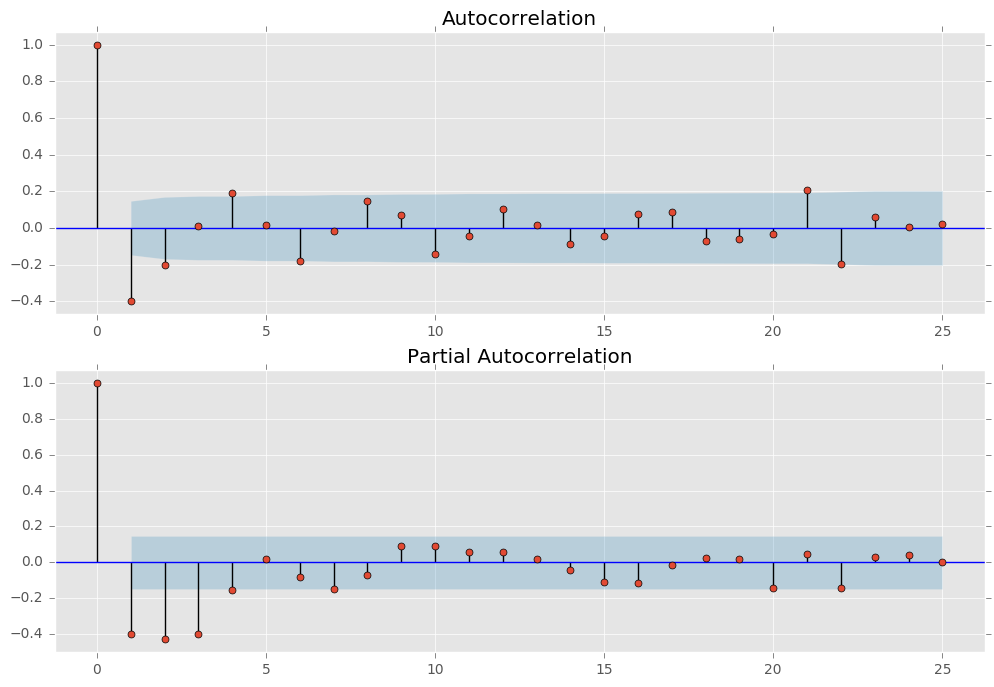

In [103]:
correlogram(diff_series(diff_series(train)))

In [104]:
arima_model = ARIMA(np.array(train), order=(1,2,3)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  177
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -704.545
Method:                       css-mle   S.D. of innovations             12.906
Date:                Tue, 09 May 2017   AIC                           1419.090
Time:                        03:12:31   BIC                           1434.971
Sample:                             2   HQIC                          1425.531
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y     0.3003      0.224      1.342      0.181      -0.138       0.739
ma.L1.D2.y    -1.1497      0.215     -5.335      0.000      -1.572      -0.727
ma.L2.D2.y     0.1213      0.216      0.561      0.5

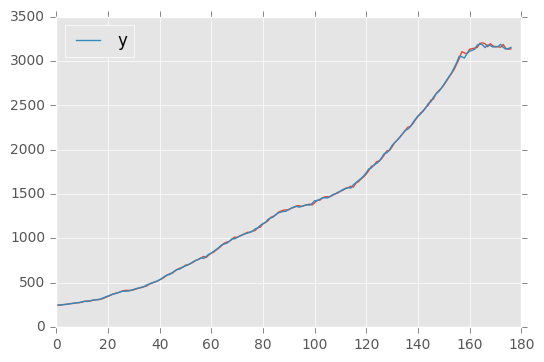

In [105]:
arima_model.plot_predict()
plt.show()

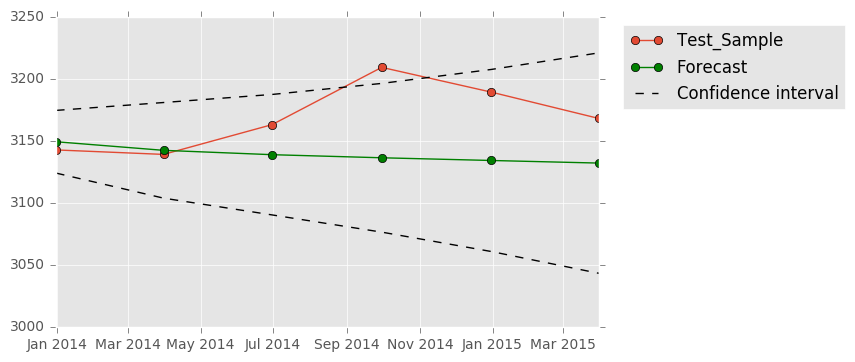

In [106]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [107]:
errors_out_sample(test, forc_arima[0])

{'MAE': 33.020749235137224,
 'MSE': 1715.0154247689682,
 'RMSE': 41.412744714266019}

### ANN

#### First launch

In [108]:
scaled_train = scaler(train)[0]

In [109]:
lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [110]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    #model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.2551
Epoch 2/100
0s - loss: 0.0701
Epoch 3/100
0s - loss: 0.0550
Epoch 4/100
0s - loss: 0.0411
Epoch 5/100
0s - loss: 0.0256
Epoch 6/100
0s - loss: 0.0140
Epoch 7/100
0s - loss: 0.0062
Epoch 8/100
0s - loss: 0.0022
Epoch 9/100
0s - loss: 6.6045e-04
Epoch 10/100
0s - loss: 2.4799e-04
Epoch 11/100
0s - loss: 1.5369e-04
Epoch 12/100
0s - loss: 1.3920e-04
Epoch 13/100
0s - loss: 1.3631e-04
Epoch 14/100
0s - loss: 1.3007e-04
Epoch 15/100
0s - loss: 1.3367e-04
Epoch 16/100
0s - loss: 1.3604e-04
Epoch 17/100
0s - loss: 1.2840e-04
Epoch 18/100
0s - loss: 1.2402e-04
Epoch 19/100
0s - loss: 1.4001e-04
Epoch 20/100
0s - loss: 1.2799e-04
Epoch 21/100
0s - loss: 1.1643e-04
Epoch 22/100
0s - loss: 1.1648e-04
Epoch 23/100
0s - loss: 1.1388e-04
Epoch 24/100
0s - loss: 1.1170e-04
Epoch 25/100
0s - loss: 1.1500e-04
Epoch 26/100
0s - loss: 1.0090e-04
Epoch 27/100
0s - loss: 1.1376e-04
Epoch 28/100
0s - loss: 9.7385e-05
Epoch 29/100
0s - loss: 1.1288e-04
Epoch 30/100
0s - loss: 1.

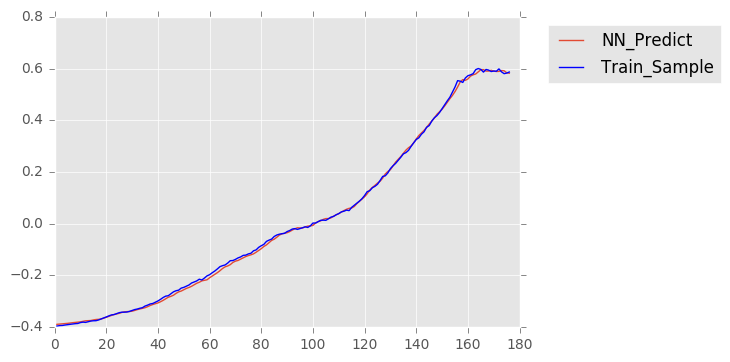

In [111]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [112]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

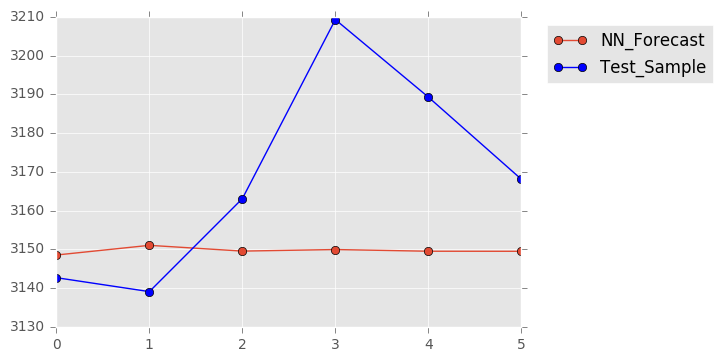

In [113]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [114]:
errors_out_sample(test, nn_forecast)

{'MAE': 24.84041341145841,
 'MSE': 968.15881567796657,
 'RMSE': 31.115250532142056}

#### Second launch

In [115]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    #model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

Epoch 1/100
0s - loss: 0.0857
Epoch 2/100
0s - loss: 0.0714
Epoch 3/100
0s - loss: 0.0540
Epoch 4/100
0s - loss: 0.0370
Epoch 5/100
0s - loss: 0.0208
Epoch 6/100
0s - loss: 0.0095
Epoch 7/100
0s - loss: 0.0032
Epoch 8/100
0s - loss: 9.0822e-04
Epoch 9/100
0s - loss: 2.4729e-04
Epoch 10/100
0s - loss: 1.2071e-04
Epoch 11/100
0s - loss: 1.0061e-04
Epoch 12/100
0s - loss: 9.6841e-05
Epoch 13/100
0s - loss: 1.0083e-04
Epoch 14/100
0s - loss: 9.6301e-05
Epoch 15/100
0s - loss: 9.1378e-05
Epoch 16/100
0s - loss: 9.5061e-05
Epoch 17/100
0s - loss: 9.6045e-05
Epoch 18/100
0s - loss: 9.8544e-05
Epoch 19/100
0s - loss: 9.7995e-05
Epoch 20/100
0s - loss: 9.7609e-05
Epoch 21/100
0s - loss: 8.5647e-05
Epoch 22/100
0s - loss: 9.2285e-05
Epoch 23/100
0s - loss: 8.6567e-05
Epoch 24/100
0s - loss: 8.2611e-05
Epoch 25/100
0s - loss: 9.4112e-05
Epoch 26/100
0s - loss: 8.4833e-05
Epoch 27/100
0s - loss: 9.2502e-05
Epoch 28/100
0s - loss: 8.0932e-05
Epoch 29/100
0s - loss: 8.1448e-05
Epoch 30/100
0s - loss

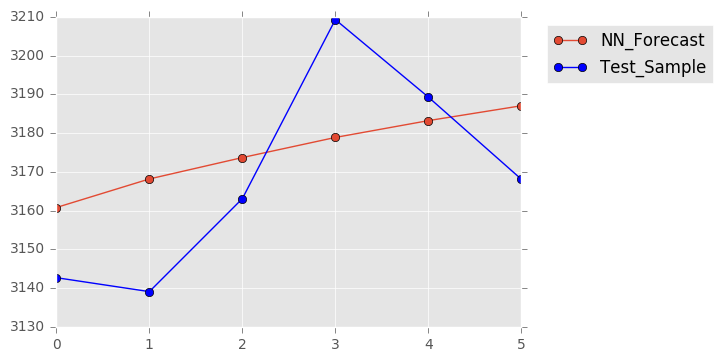

In [116]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [117]:
errors_out_sample(test, nn_forecast)

{'MAE': 18.871809895833469,
 'MSE': 434.51513564189781,
 'RMSE': 20.84502664046985}

#### Third launch (anouther NN)

In [118]:
lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [119]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

Epoch 1/100
0s - loss: 0.5396
Epoch 2/100
0s - loss: 0.3144
Epoch 3/100
0s - loss: 0.2225
Epoch 4/100
0s - loss: 0.1926
Epoch 5/100
0s - loss: 0.1543
Epoch 6/100
0s - loss: 0.1302
Epoch 7/100
0s - loss: 0.1239
Epoch 8/100
0s - loss: 0.1267
Epoch 9/100
0s - loss: 0.1080
Epoch 10/100
0s - loss: 0.1100
Epoch 11/100
0s - loss: 0.1066
Epoch 12/100
0s - loss: 0.1152
Epoch 13/100
0s - loss: 0.1027
Epoch 14/100
0s - loss: 0.1090
Epoch 15/100
0s - loss: 0.1075
Epoch 16/100
0s - loss: 0.1020
Epoch 17/100
0s - loss: 0.1042
Epoch 18/100
0s - loss: 0.1058
Epoch 19/100
0s - loss: 0.0992
Epoch 20/100
0s - loss: 0.1035
Epoch 21/100
0s - loss: 0.0992
Epoch 22/100
0s - loss: 0.1056
Epoch 23/100
0s - loss: 0.1034
Epoch 24/100
0s - loss: 0.0960
Epoch 25/100
0s - loss: 0.0990
Epoch 26/100
0s - loss: 0.0984
Epoch 27/100
0s - loss: 0.0937
Epoch 28/100
0s - loss: 0.0905
Epoch 29/100
0s - loss: 0.0830
Epoch 30/100
0s - loss: 0.0776
Epoch 31/100
0s - loss: 0.0714
Epoch 32/100
0s - loss: 0.0564
Epoch 33/100
0s -

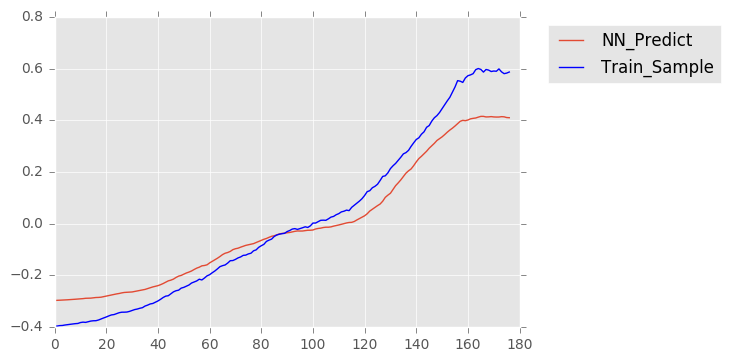

In [120]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

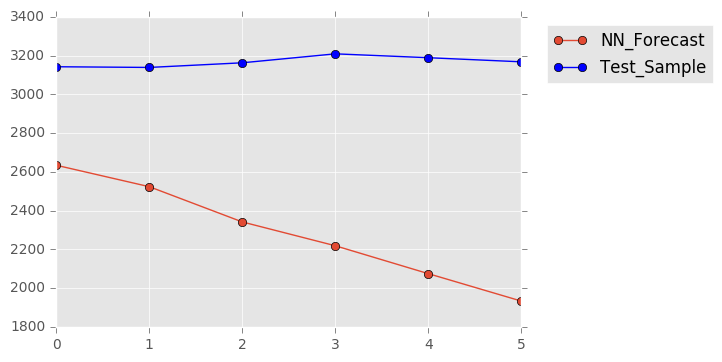

In [121]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [122]:
errors_out_sample(test, nn_forecast)

{'MAE': 880.97601725260427,
 'MSE': 843566.76106327178,
 'RMSE': 918.45890548422028}

### Hybrid

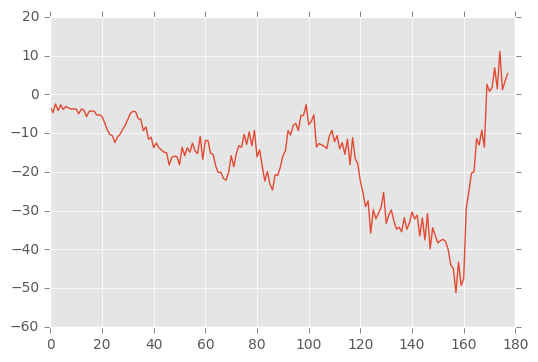

In [123]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [124]:
scaled_resids_arima = scaler(resids_arima)[0]

In [125]:
lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1214
Epoch 2/100
0s - loss: 0.0644
Epoch 3/100
0s - loss: 0.0549
Epoch 4/100
0s - loss: 0.0493
Epoch 5/100
0s - loss: 0.0425
Epoch 6/100
0s - loss: 0.0424
Epoch 7/100
0s - loss: 0.0387
Epoch 8/100
0s - loss: 0.0400
Epoch 9/100
0s - loss: 0.0409
Epoch 10/100
0s - loss: 0.0399
Epoch 11/100
0s - loss: 0.0374
Epoch 12/100
0s - loss: 0.0362
Epoch 13/100
0s - loss: 0.0371
Epoch 14/100
0s - loss: 0.0375
Epoch 15/100
0s - loss: 0.0377
Epoch 16/100
0s - loss: 0.0339
Epoch 17/100
0s - loss: 0.0337
Epoch 18/100
0s - loss: 0.0319
Epoch 19/100
0s - loss: 0.0328
Epoch 20/100
0s - loss: 0.0281
Epoch 21/100
0s - loss: 0.0263
Epoch 22/100
0s - loss: 0.0256
Epoch 23/100
0s - loss: 0.0255
Epoch 24/100
0s - loss: 0.0222
Epoch 25/100
0s - loss: 0.0203
Epoch 26/100
0s - loss: 0.0147
Epoch 27/100
0s - loss: 0.0155
Epoch 28/100
0s - loss: 0.0160
Epoch 29/100
0s - loss: 0.0138
Epoch 30/100
0s - loss: 0.0127
Epoch 31/100
0s - loss: 0.0161
Epoch 32/100
0s - loss: 0.0115
Epoch 33/100
0s -

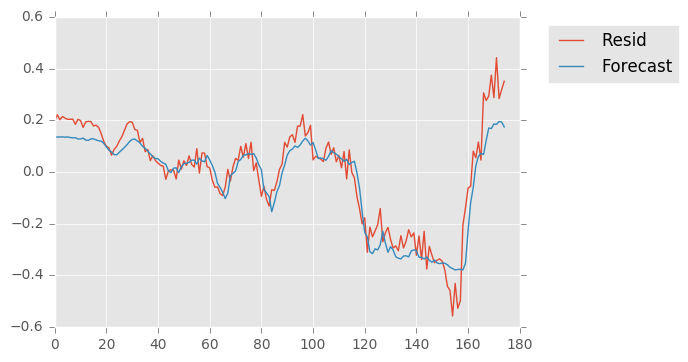

In [126]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [127]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

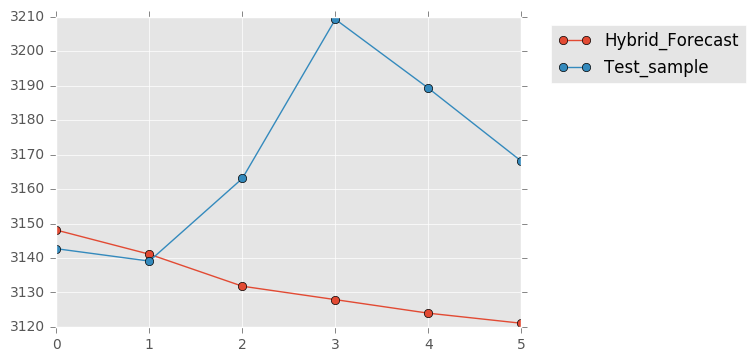

In [128]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [129]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 38.741435035053804,
 'MSE': 2352.6656561660034,
 'RMSE': 48.504284925829012}

---

---

---

# Real Government Consumption Expenditures and Gross Investment, Chained Dollars

In [130]:
real_gov_ci = df.iloc[40, 1:66].copy()
real_gov_ci.index = pd.DatetimeIndex(start='1999-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                 -2.775523
p-value                         0.061856
#Lags Used                      6.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


Results of KPSS Test:
Test Statistic            0.510523
p-value                   0.039297
#Lags Used               11.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


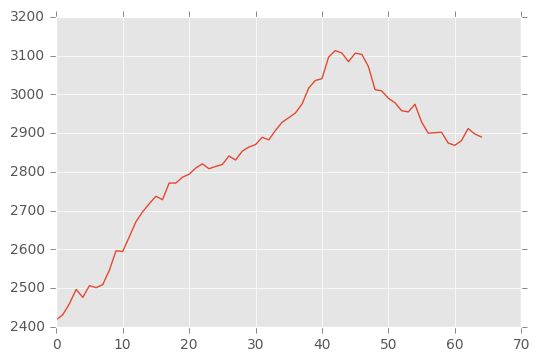

In [131]:
test_stationarity(real_gov_ci)

Results of Dickey-Fuller Test:
Test Statistic                 -1.787689
p-value                         0.386591
#Lags Used                      7.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


Results of KPSS Test:
Test Statistic            0.410652
p-value                   0.072564
#Lags Used               11.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


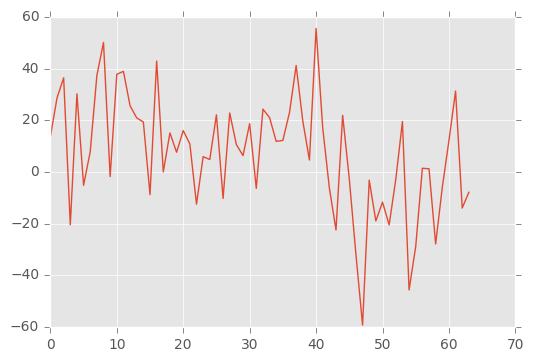

In [132]:
test_stationarity(diff_series(real_gov_ci))

Results of Dickey-Fuller Test:
Test Statistic                 -3.495373
p-value                         0.008107
#Lags Used                      6.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


Results of KPSS Test:
Test Statistic            0.105765
p-value                   0.100000
#Lags Used               11.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


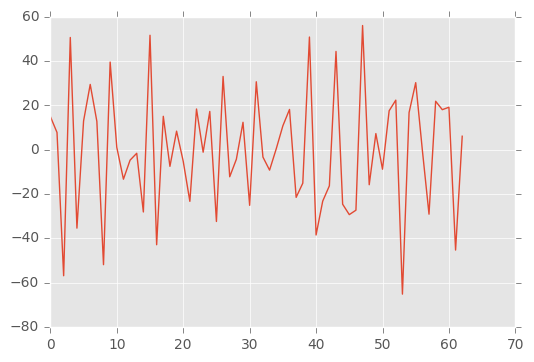

In [133]:
test_stationarity(diff_series(diff_series(real_gov_ci)))

In [134]:
train = real_gov_ci[:-6]
test = real_gov_ci[-6:]

### ARIMA

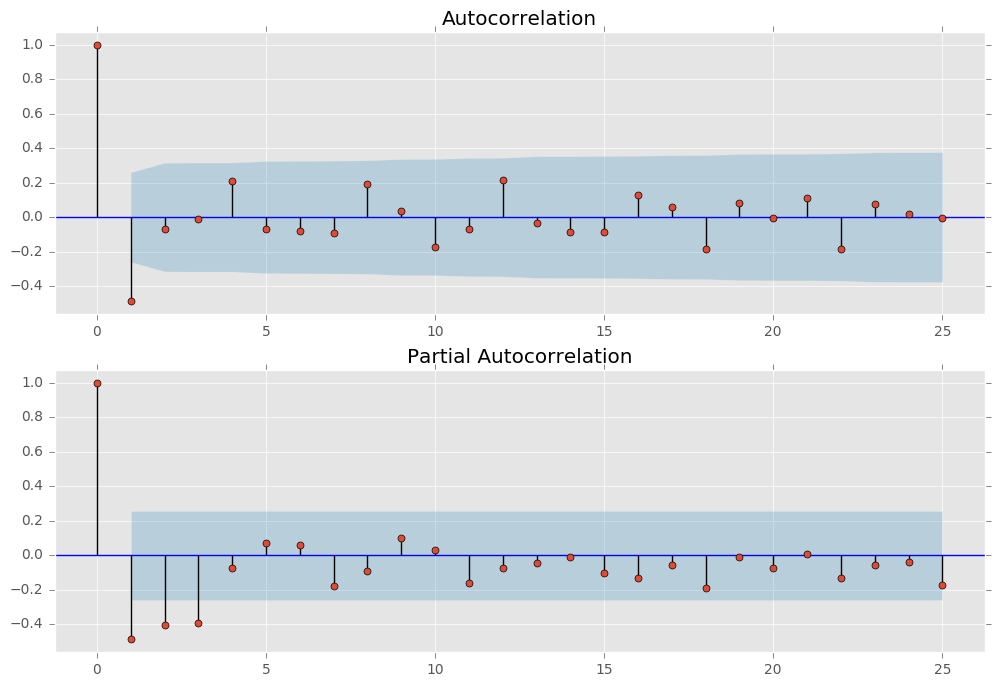

In [135]:
correlogram(diff_series(diff_series(train)))

In [136]:
arima_model = ARIMA(np.array(train), order=(1,2,2)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   57
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -253.645
Method:                       css-mle   S.D. of innovations             20.132
Date:                Tue, 09 May 2017   AIC                            517.291
Time:                        03:14:03   BIC                            527.506
Sample:                             2   HQIC                           521.261
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5965      0.229     -2.607      0.012      -1.045      -0.148
ar.L1.D2.y     0.8028      0.197      4.075      0.000       0.417       1.189
ma.L1.D2.y    -1.6876      0.216     -7.808      0.0

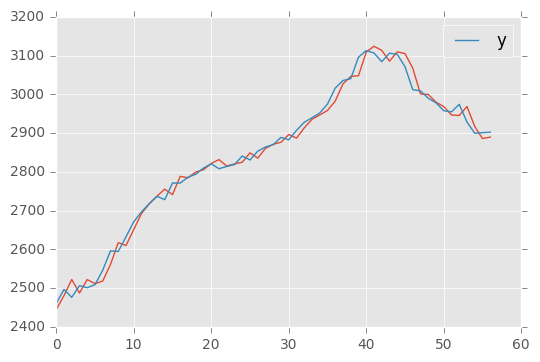

In [137]:
arima_model.plot_predict()
plt.show()

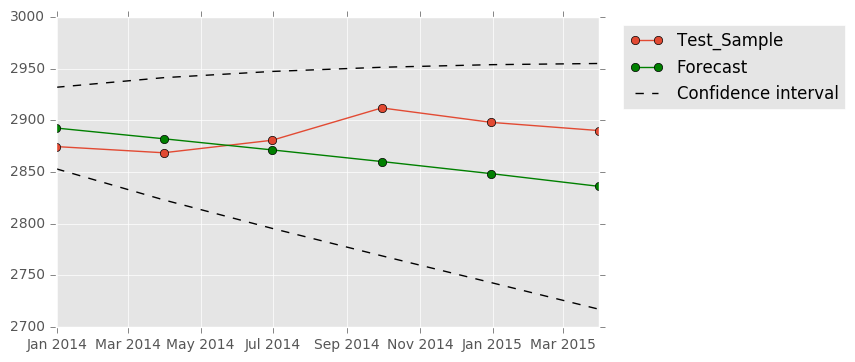

In [138]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [139]:
errors_out_sample(test, forc_arima[0])

{'MAE': 32.716413730467217,
 'MSE': 1443.2844748839834,
 'RMSE': 37.990584029256297}

### ANN

In [140]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [141]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0712
Epoch 2/100
0s - loss: 0.0679
Epoch 3/100
0s - loss: 0.0694
Epoch 4/100
0s - loss: 0.0660
Epoch 5/100
0s - loss: 0.0657
Epoch 6/100
0s - loss: 0.0653
Epoch 7/100
0s - loss: 0.0624
Epoch 8/100
0s - loss: 0.0613
Epoch 9/100
0s - loss: 0.0594
Epoch 10/100
0s - loss: 0.0588
Epoch 11/100
0s - loss: 0.0567
Epoch 12/100
0s - loss: 0.0541
Epoch 13/100
0s - loss: 0.0480
Epoch 14/100
0s - loss: 0.0458
Epoch 15/100
0s - loss: 0.0445
Epoch 16/100
0s - loss: 0.0373
Epoch 17/100
0s - loss: 0.0328
Epoch 18/100
0s - loss: 0.0281
Epoch 19/100
0s - loss: 0.0231
Epoch 20/100
0s - loss: 0.0192
Epoch 21/100
0s - loss: 0.0151
Epoch 22/100
0s - loss: 0.0117
Epoch 23/100
0s - loss: 0.0089
Epoch 24/100
0s - loss: 0.0066
Epoch 25/100
0s - loss: 0.0046
Epoch 26/100
0s - loss: 0.0036
Epoch 27/100
0s - loss: 0.0028
Epoch 28/100
0s - loss: 0.0024
Epoch 29/100
0s - loss: 0.0022
Epoch 30/100
0s - loss: 0.0020
Epoch 31/100
0s - loss: 0.0019
Epoch 32/100
0s - loss: 0.0019
Epoch 33/100
0s -

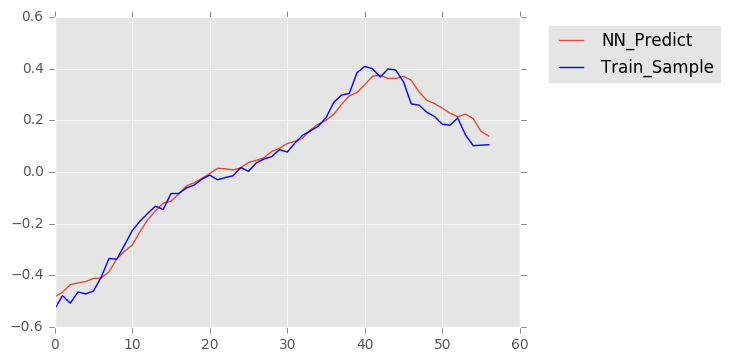

In [142]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [143]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

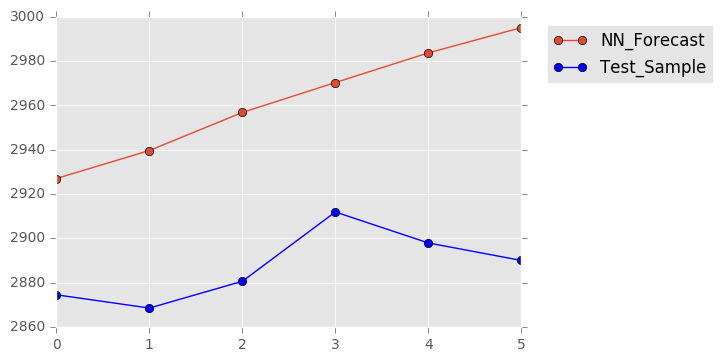

In [144]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [145]:
errors_out_sample(test, nn_forecast)

{'MAE': 74.89406738281248,
 'MSE': 5913.0132101245699,
 'RMSE': 76.896119603817269}

### Hybrid

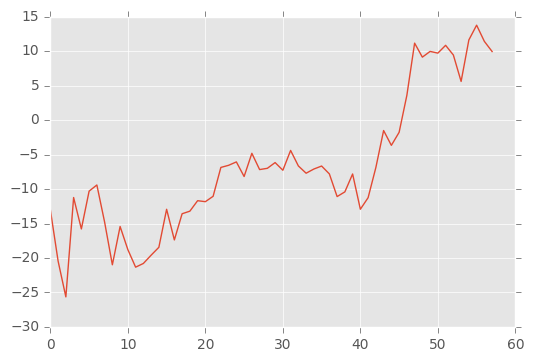

In [146]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [147]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0910
Epoch 2/100
0s - loss: 0.0785
Epoch 3/100
0s - loss: 0.0773
Epoch 4/100
0s - loss: 0.0741
Epoch 5/100
0s - loss: 0.0601
Epoch 6/100
0s - loss: 0.0703
Epoch 7/100
0s - loss: 0.0753
Epoch 8/100
0s - loss: 0.0646
Epoch 9/100
0s - loss: 0.0780
Epoch 10/100
0s - loss: 0.0724
Epoch 11/100
0s - loss: 0.0702
Epoch 12/100
0s - loss: 0.0693
Epoch 13/100
0s - loss: 0.0734
Epoch 14/100
0s - loss: 0.0711
Epoch 15/100
0s - loss: 0.0624
Epoch 16/100
0s - loss: 0.0638
Epoch 17/100
0s - loss: 0.0605
Epoch 18/100
0s - loss: 0.0583
Epoch 19/100
0s - loss: 0.0651
Epoch 20/100
0s - loss: 0.0607
Epoch 21/100
0s - loss: 0.0545
Epoch 22/100
0s - loss: 0.0650
Epoch 23/100
0s - loss: 0.0634
Epoch 24/100
0s - loss: 0.0643
Epoch 25/100
0s - loss: 0.0582
Epoch 26/100
0s - loss: 0.0611
Epoch 27/100
0s - loss: 0.0581
Epoch 28/100
0s - loss: 0.0653
Epoch 29/100
0s - loss: 0.0617
Epoch 30/100
0s - loss: 0.0647
Epoch 31/100
0s - loss: 0.0642
Epoch 32/100
0s - loss: 0.0602
Epoch 33/100
0s -

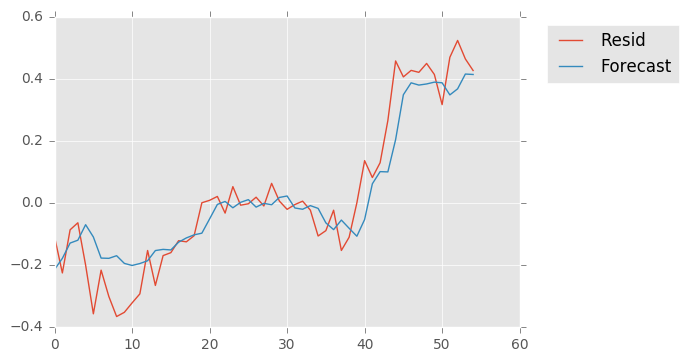

In [148]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [149]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

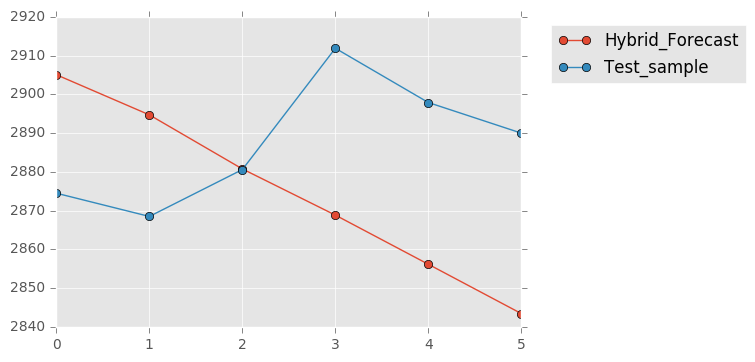

In [150]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [151]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 31.386653307901042,
 'MSE': 1231.1353796098945,
 'RMSE': 35.087538808099588}

---

---

---

# Personal Income and Its Disposition

In [152]:
pers_inc = df.iloc[48, 1:186].copy()
pers_inc.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   4.061463
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    172.000000
Critical Value (1%)             -3.468952
Critical Value (5%)             -2.878495
Critical Value (10%)            -2.575809
dtype: float64


Results of KPSS Test:
Test Statistic            1.308789
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


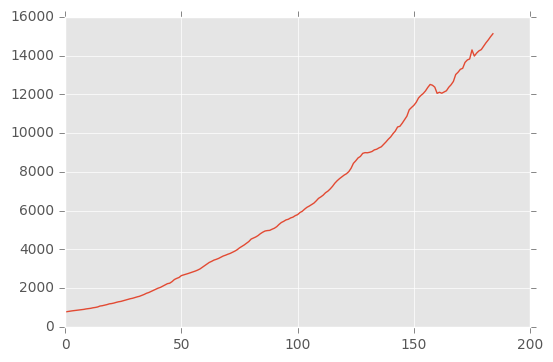

In [153]:
test_stationarity(pers_inc)

Results of Dickey-Fuller Test:
Test Statistic                  -2.563036
p-value                          0.100880
#Lags Used                      14.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


Results of KPSS Test:
Test Statistic            0.980676
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


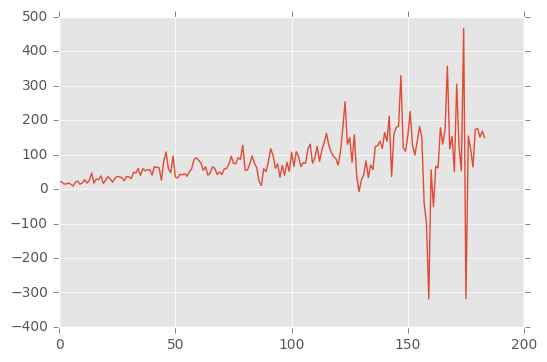

In [154]:
test_stationarity(diff_series(pers_inc))

Results of Dickey-Fuller Test:
Test Statistic                -6.837962e+00
p-value                        1.821920e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.036527
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


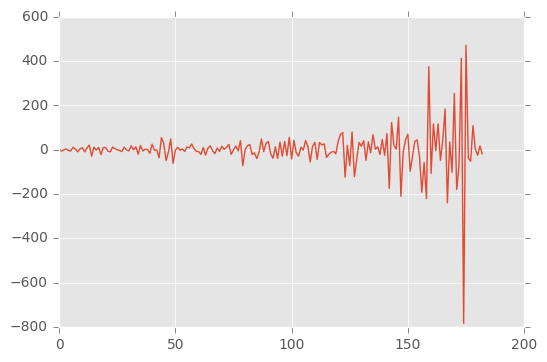

In [155]:
test_stationarity(diff_series(diff_series(pers_inc)))

In [156]:
train = pers_inc[:-6]
test = pers_inc[-6:]

### ARIMA

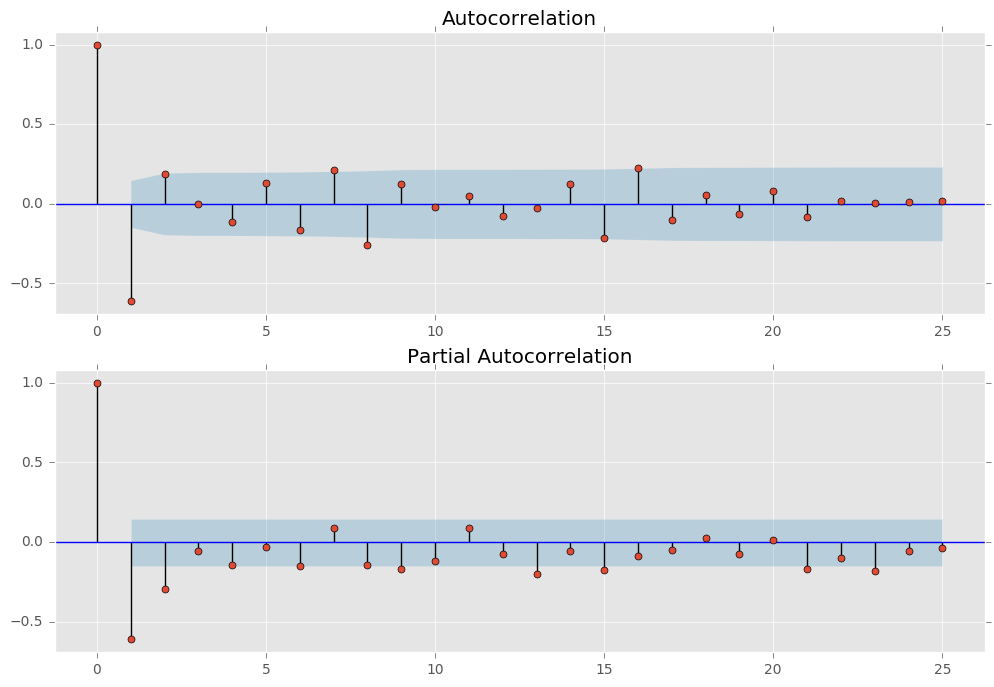

In [157]:
correlogram(diff_series(diff_series(train)))

In [158]:
arima_model = ARIMA(np.array(train), order=(1,2,2)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  177
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1015.330
Method:                       css-mle   S.D. of innovations             74.827
Date:                Tue, 09 May 2017   AIC                           2038.661
Time:                        03:14:23   BIC                           2051.366
Sample:                             2   HQIC                          2043.813
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.3891      0.242     -1.610      0.109      -0.863       0.085
ma.L1.D2.y    -0.4556      0.240     -1.901      0.059      -0.925       0.014
ma.L2.D2.y    -0.1016      0.220     -0.461      0.6

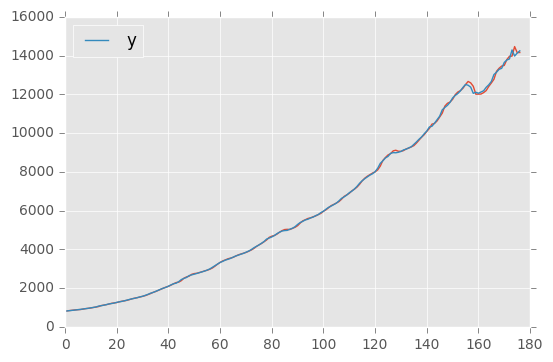

In [159]:
arima_model.plot_predict()
plt.show()

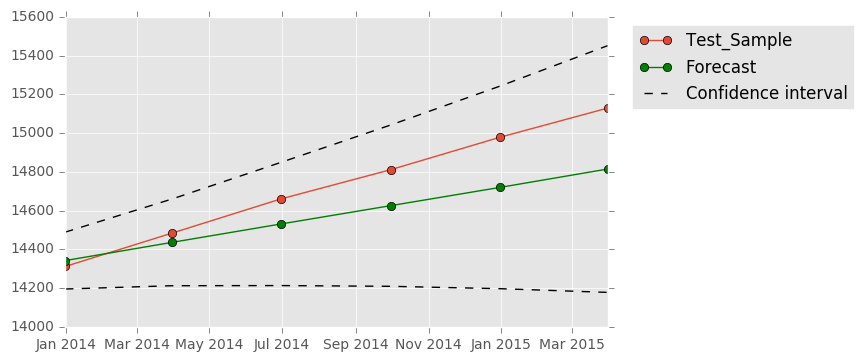

In [160]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [161]:
errors_out_sample(test, forc_arima[0])

{'MAE': 161.15658247557135,
 'MSE': 36731.377047676266,
 'RMSE': 191.654316538074}

### ANN

In [162]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.3901
Epoch 2/100
0s - loss: 0.1184
Epoch 3/100
0s - loss: 0.1026
Epoch 4/100
0s - loss: 0.1002
Epoch 5/100
0s - loss: 0.1113
Epoch 6/100
0s - loss: 0.0961
Epoch 7/100
0s - loss: 0.0983
Epoch 8/100
0s - loss: 0.0945
Epoch 9/100
0s - loss: 0.0889
Epoch 10/100
0s - loss: 0.0885
Epoch 11/100
0s - loss: 0.0949
Epoch 12/100
0s - loss: 0.0897
Epoch 13/100
0s - loss: 0.0909
Epoch 14/100
0s - loss: 0.0821
Epoch 15/100
0s - loss: 0.0681
Epoch 16/100
0s - loss: 0.0666
Epoch 17/100
0s - loss: 0.0561
Epoch 18/100
0s - loss: 0.0514
Epoch 19/100
0s - loss: 0.0459
Epoch 20/100
0s - loss: 0.0322
Epoch 21/100
0s - loss: 0.0326
Epoch 22/100
0s - loss: 0.0242
Epoch 23/100
0s - loss: 0.0256
Epoch 24/100
0s - loss: 0.0158
Epoch 25/100
0s - loss: 0.0171
Epoch 26/100
0s - loss: 0.0245
Epoch 27/100
0s - loss: 0.0187
Epoch 28/100
0s - loss: 0.0188
Epoch 29/100
0s - loss: 0.0172
Epoch 30/100
0s - loss: 0.0173
Epoch 31/100
0s - loss: 0.0204
Epoch 32/100
0s - loss: 0.0212
Epoch 33/100
0s -

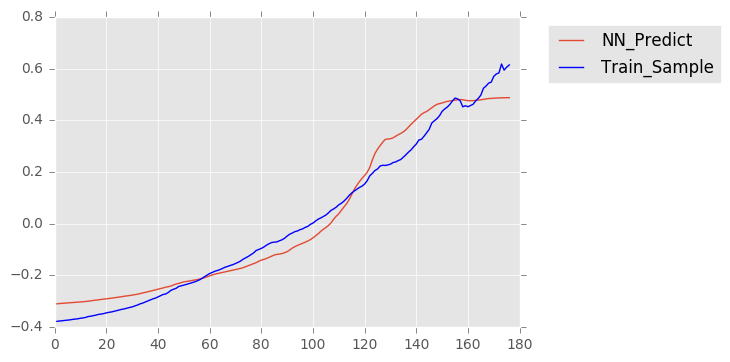

In [163]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

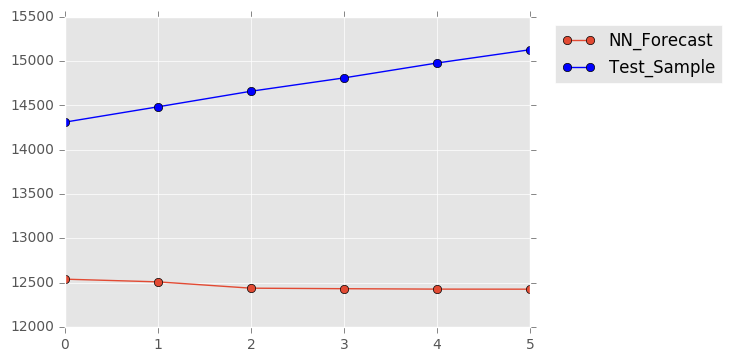

In [164]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [165]:
errors_out_sample(test, forc_arima[0])

{'MAE': 161.15658247557135,
 'MSE': 36731.377047676266,
 'RMSE': 191.654316538074}

### Hybrid

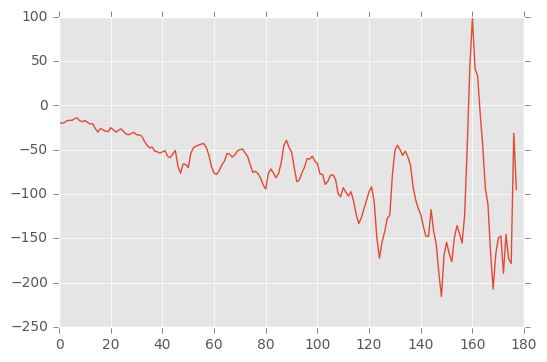

In [166]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [167]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 4

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.0439
Epoch 2/100
0s - loss: 0.0304
Epoch 3/100
0s - loss: 0.0283
Epoch 4/100
0s - loss: 0.0275
Epoch 5/100
0s - loss: 0.0262
Epoch 6/100
0s - loss: 0.0266
Epoch 7/100
0s - loss: 0.0260
Epoch 8/100
0s - loss: 0.0266
Epoch 9/100
0s - loss: 0.0259
Epoch 10/100
0s - loss: 0.0256
Epoch 11/100
0s - loss: 0.0267
Epoch 12/100
0s - loss: 0.0253
Epoch 13/100
0s - loss: 0.0248
Epoch 14/100
0s - loss: 0.0267
Epoch 15/100
0s - loss: 0.0250
Epoch 16/100
0s - loss: 0.0230
Epoch 17/100
0s - loss: 0.0236
Epoch 18/100
0s - loss: 0.0232
Epoch 19/100
0s - loss: 0.0217
Epoch 20/100
0s - loss: 0.0196
Epoch 21/100
0s - loss: 0.0185
Epoch 22/100
0s - loss: 0.0175
Epoch 23/100
0s - loss: 0.0169
Epoch 24/100
0s - loss: 0.0162
Epoch 25/100
0s - loss: 0.0149
Epoch 26/100
0s - loss: 0.0184
Epoch 27/100
0s - loss: 0.0154
Epoch 28/100
0s - loss: 0.0149
Epoch 29/100
0s - loss: 0.0157
Epoch 30/100
0s - loss: 0.0136
Epoch 31/100
0s - loss: 0.0143
Epoch 32/100
0s - loss: 0.0129
Epoch 33/100
0s -

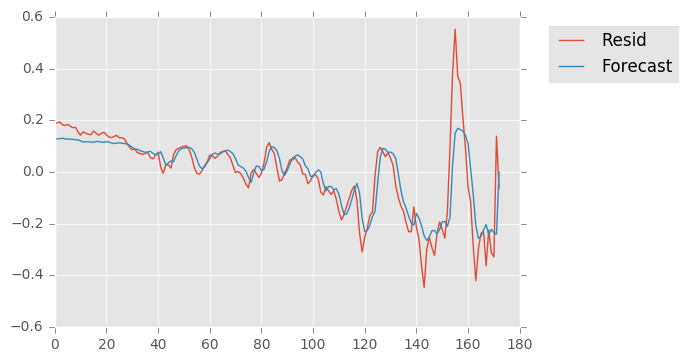

In [168]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [169]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

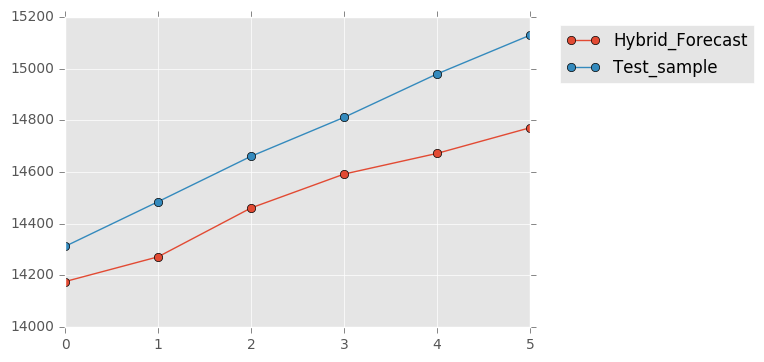

In [170]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [171]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 239.19744365645843,
 'MSE': 62553.995021733928,
 'RMSE': 250.10796672983835}

In [172]:
nn_resids_forecast

array([-166.71359253, -165.32910156,  -70.63162231,  -34.12498474,
        -48.59724808,  -43.74846649], dtype=float32)

---

---

---

# Wages and salaries

In [173]:
wages = df.iloc[49, 1:186].copy()
wages.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   2.094862
p-value                          0.998784
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


Results of KPSS Test:
Test Statistic            1.320211
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


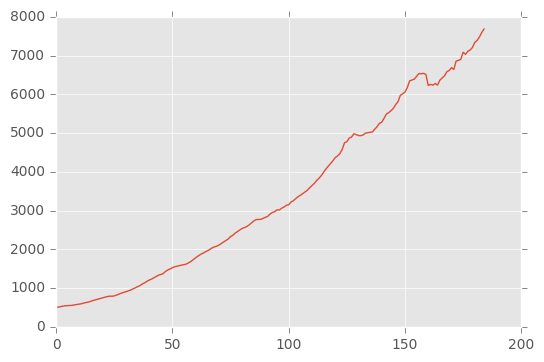

In [174]:
test_stationarity(wages)

Results of Dickey-Fuller Test:
Test Statistic                  -2.624336
p-value                          0.088071
#Lags Used                      13.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


Results of KPSS Test:
Test Statistic            0.644206
p-value                   0.018618
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


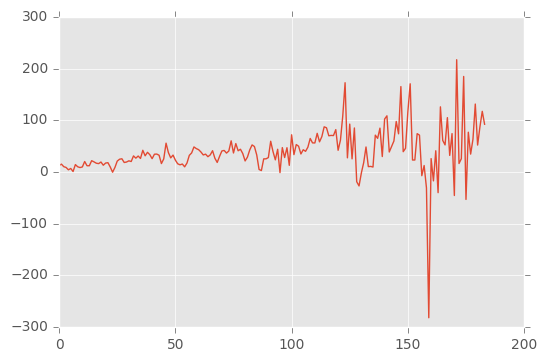

In [175]:
test_stationarity(diff_series(wages))

Results of Dickey-Fuller Test:
Test Statistic                -5.853942e+00
p-value                        3.536029e-07
#Lags Used                     1.200000e+01
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (5%)           -2.878696e+00
Critical Value (10%)          -2.575917e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.040097
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


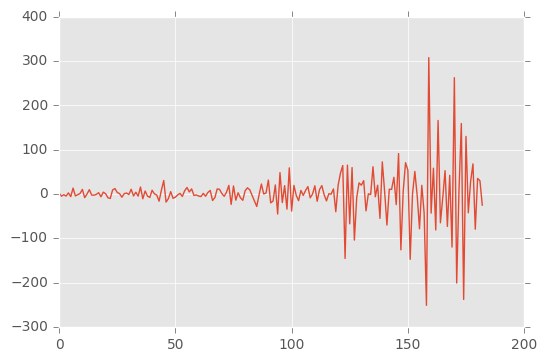

In [176]:
test_stationarity(diff_series(diff_series(wages)))

In [177]:
train = wages[:-6]
test = wages[-6:]

### ARIMA

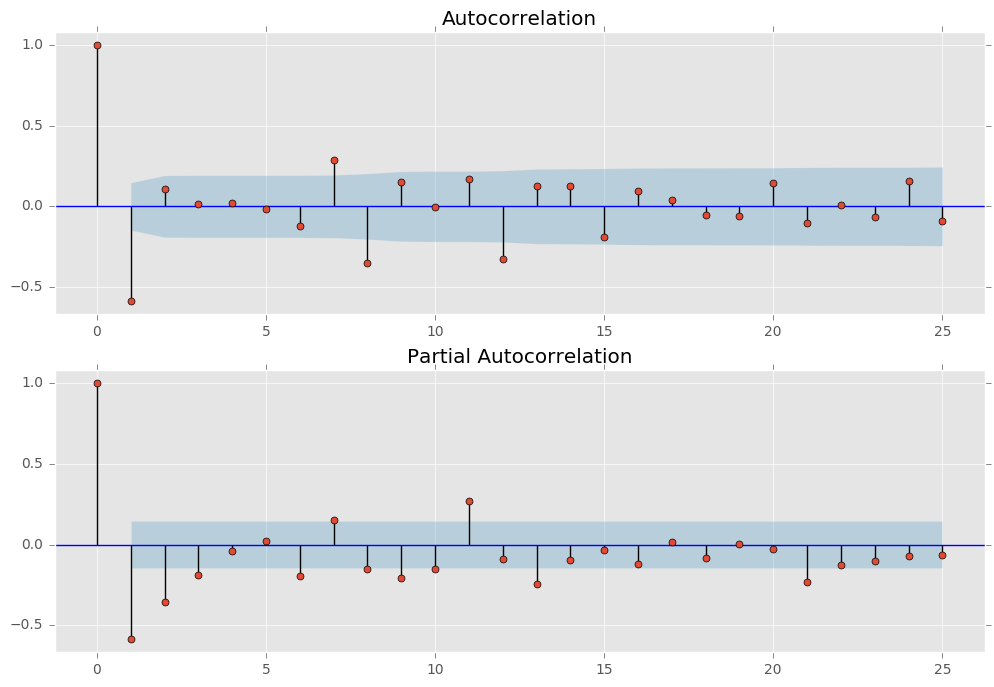

In [178]:
correlogram(diff_series(diff_series(train)))

In [179]:
arima_model = ARIMA(np.array(train), order=(2,2,1)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  177
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -918.706
Method:                       css-mle   S.D. of innovations             43.343
Date:                Tue, 09 May 2017   AIC                           1845.413
Time:                        03:15:16   BIC                           1858.117
Sample:                             2   HQIC                          1850.565
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.3050      0.271     -1.126      0.262      -0.836       0.226
ar.L2.D2.y    -0.0588      0.206     -0.286      0.775      -0.463       0.345
ma.L1.D2.y    -0.5652      0.269     -2.103      0.0

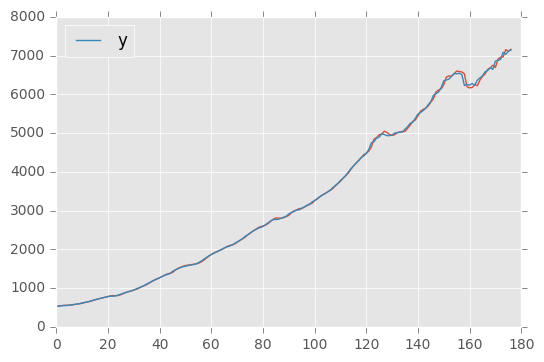

In [180]:
arima_model.plot_predict()
plt.show()

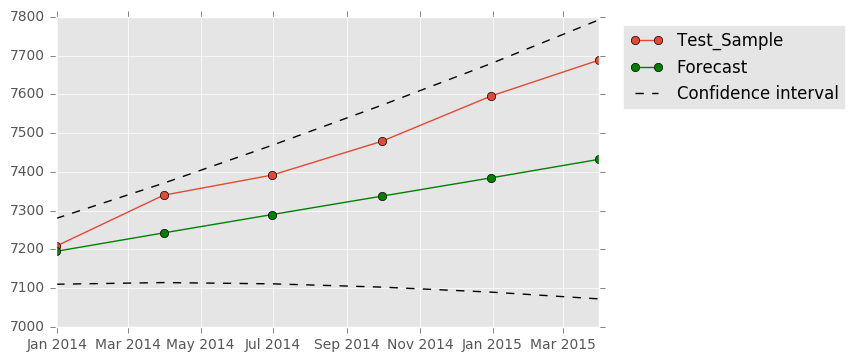

In [181]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [182]:
errors_out_sample(test, forc_arima[0])

{'MAE': 136.91683943490702,
 'MSE': 25043.615402899846,
 'RMSE': 158.2517469189514}

### ANN

In [183]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1414
Epoch 2/100
0s - loss: 0.1077
Epoch 3/100
0s - loss: 0.1008
Epoch 4/100
0s - loss: 0.0925
Epoch 5/100
0s - loss: 0.0924
Epoch 6/100
0s - loss: 0.0843
Epoch 7/100
0s - loss: 0.0809
Epoch 8/100
0s - loss: 0.0748
Epoch 9/100
0s - loss: 0.0762
Epoch 10/100
0s - loss: 0.0618
Epoch 11/100
0s - loss: 0.0652
Epoch 12/100
0s - loss: 0.0600
Epoch 13/100
0s - loss: 0.0580
Epoch 14/100
0s - loss: 0.0428
Epoch 15/100
0s - loss: 0.0504
Epoch 16/100
0s - loss: 0.0474
Epoch 17/100
0s - loss: 0.0397
Epoch 18/100
0s - loss: 0.0354
Epoch 19/100
0s - loss: 0.0409
Epoch 20/100
0s - loss: 0.0358
Epoch 21/100
0s - loss: 0.0334
Epoch 22/100
0s - loss: 0.0409
Epoch 23/100
0s - loss: 0.0393
Epoch 24/100
0s - loss: 0.0333
Epoch 25/100
0s - loss: 0.0381
Epoch 26/100
0s - loss: 0.0312
Epoch 27/100
0s - loss: 0.0295
Epoch 28/100
0s - loss: 0.0328
Epoch 29/100
0s - loss: 0.0259
Epoch 30/100
0s - loss: 0.0360
Epoch 31/100
0s - loss: 0.0300
Epoch 32/100
0s - loss: 0.0272
Epoch 33/100
0s -

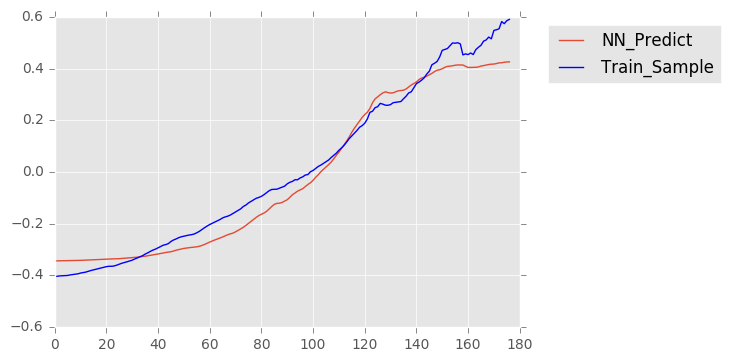

In [184]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

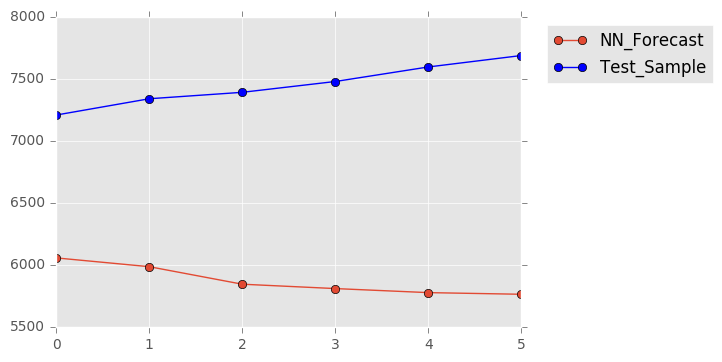

In [185]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [186]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 7039.6858896768754,
 'MSE': 49561562.803279974,
 'RMSE': 7039.9973581870026}

### Hybrid

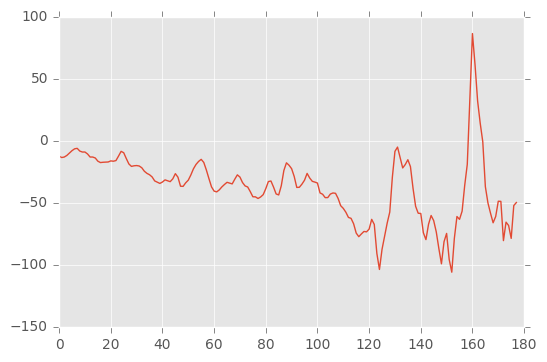

In [187]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [188]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1101
Epoch 2/100
0s - loss: 0.0398
Epoch 3/100
0s - loss: 0.0323
Epoch 4/100
0s - loss: 0.0271
Epoch 5/100
0s - loss: 0.0231
Epoch 6/100
0s - loss: 0.0241
Epoch 7/100
0s - loss: 0.0215
Epoch 8/100
0s - loss: 0.0216
Epoch 9/100
0s - loss: 0.0208
Epoch 10/100
0s - loss: 0.0189
Epoch 11/100
0s - loss: 0.0201
Epoch 12/100
0s - loss: 0.0205
Epoch 13/100
0s - loss: 0.0195
Epoch 14/100
0s - loss: 0.0204
Epoch 15/100
0s - loss: 0.0185
Epoch 16/100
0s - loss: 0.0205
Epoch 17/100
0s - loss: 0.0189
Epoch 18/100
0s - loss: 0.0213
Epoch 19/100
0s - loss: 0.0187
Epoch 20/100
0s - loss: 0.0189
Epoch 21/100
0s - loss: 0.0191
Epoch 22/100
0s - loss: 0.0192
Epoch 23/100
0s - loss: 0.0185
Epoch 24/100
0s - loss: 0.0199
Epoch 25/100
0s - loss: 0.0181
Epoch 26/100
0s - loss: 0.0173
Epoch 27/100
0s - loss: 0.0190
Epoch 28/100
0s - loss: 0.0186
Epoch 29/100
0s - loss: 0.0167
Epoch 30/100
0s - loss: 0.0170
Epoch 31/100
0s - loss: 0.0171
Epoch 32/100
0s - loss: 0.0162
Epoch 33/100
0s -

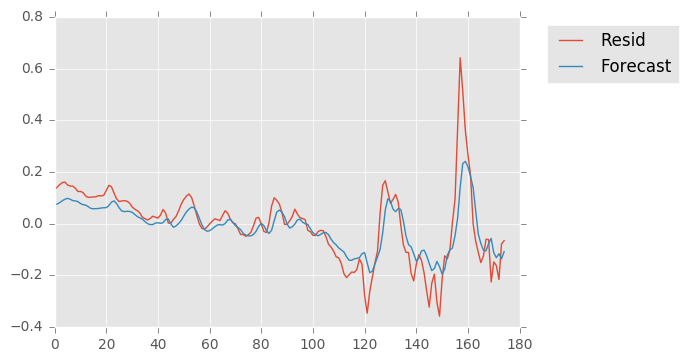

In [189]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [190]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

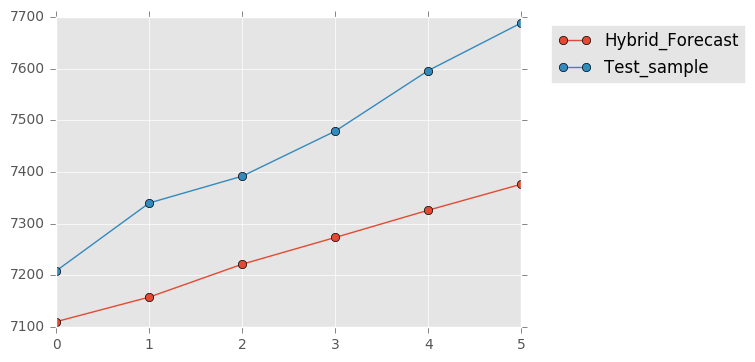

In [191]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [192]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 206.52865647693989,
 'MSE': 47457.995704272791,
 'RMSE': 217.84856140051232}

In [193]:
nn_resids_forecast

array([-84.89848328, -84.89848328, -68.49853516, -64.27496338,
       -58.96934891, -56.13108826], dtype=float32)

---

---

---

# Personal consumption expenditures (PCE)

In [194]:
pers_consump_exp = df.iloc[55, 1:186].copy()
pers_consump_exp.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   0.975815
p-value                          0.994004
#Lags Used                       3.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


Results of KPSS Test:
Test Statistic            1.321437
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


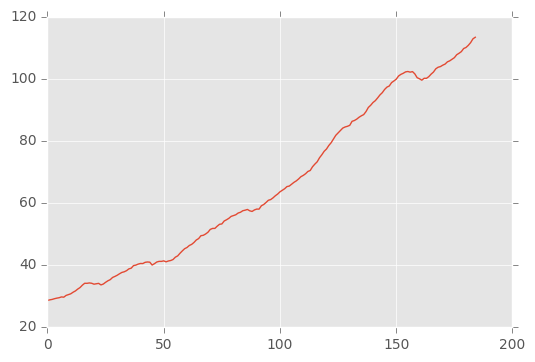

In [195]:
test_stationarity(pers_consump_exp)

Results of Dickey-Fuller Test:
Test Statistic                  -3.731468
p-value                          0.003692
#Lags Used                       2.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


Results of KPSS Test:
Test Statistic            0.401991
p-value                   0.076297
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


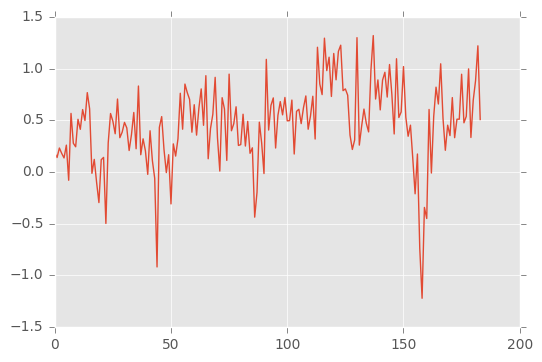

In [196]:
test_stationarity(diff_series(pers_consump_exp))

In [197]:
train = pers_consump_exp[:-6]
test = pers_consump_exp[-6:]

### ARIMA

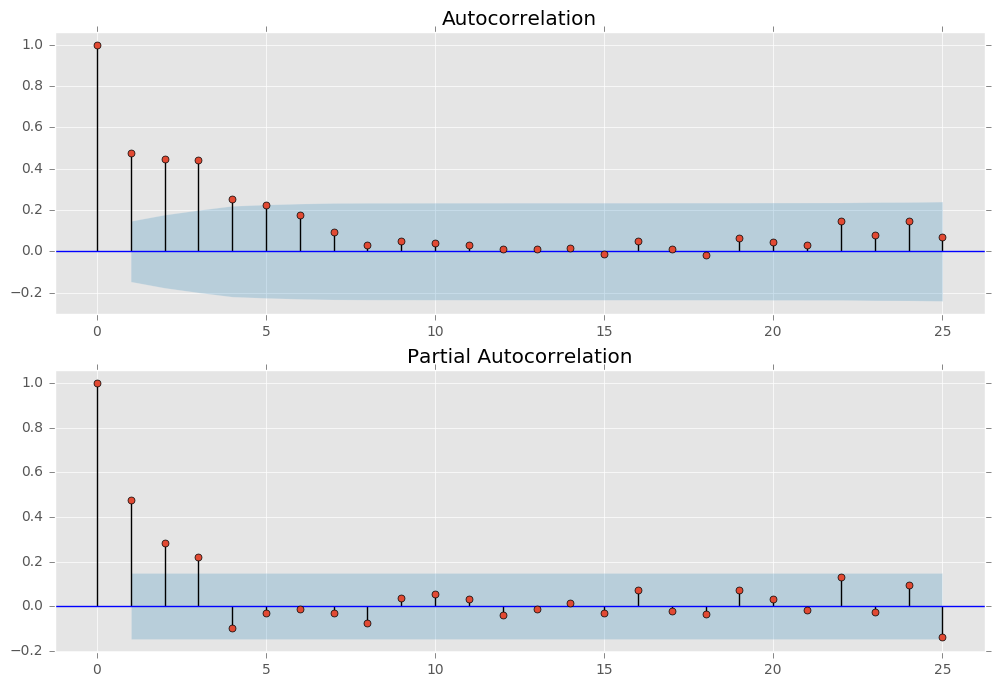

In [198]:
correlogram(diff_series(train))

In [199]:
arima_model = ARIMA(np.array(train), order=(4,1,1)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  178
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -58.052
Method:                       css-mle   S.D. of innovations              0.334
Date:                Tue, 09 May 2017   AIC                            128.105
Time:                        03:16:08   BIC                            147.195
Sample:                             1   HQIC                           135.846
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.3418      0.618     -0.553      0.581      -1.553       0.869
ar.L2.D.y      0.5160      0.211      2.447      0.015       0.103       0.929
ar.L3.D.y      0.4876      0.168      2.899      0.0

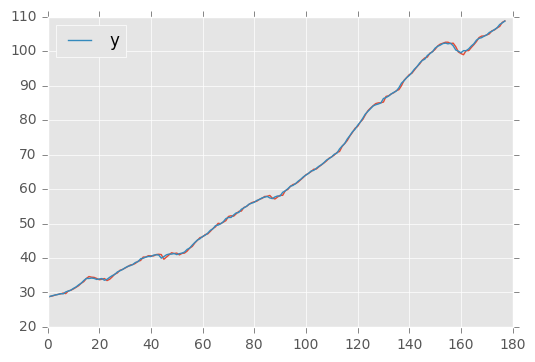

In [200]:
arima_model.plot_predict()
plt.show()

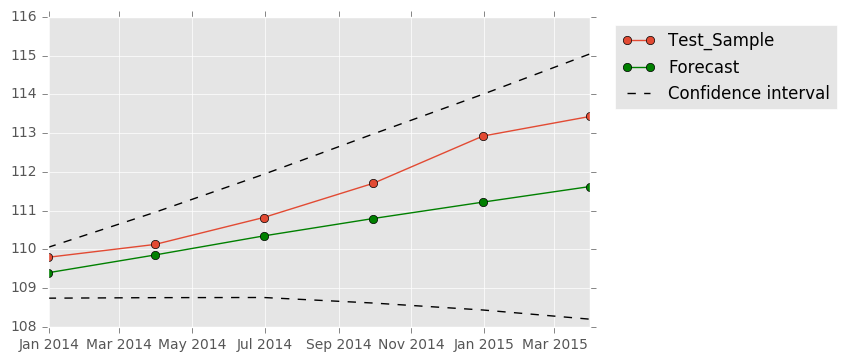

In [201]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [202]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.92813843344956126,
 'MSE': 1.2440547087884668,
 'RMSE': 1.115372004664124}

### ANN

In [203]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1494
Epoch 2/100
0s - loss: 0.1141
Epoch 3/100
0s - loss: 0.1152
Epoch 4/100
0s - loss: 0.0937
Epoch 5/100
0s - loss: 0.0989
Epoch 6/100
0s - loss: 0.0951
Epoch 7/100
0s - loss: 0.0933
Epoch 8/100
0s - loss: 0.0943
Epoch 9/100
0s - loss: 0.0871
Epoch 10/100
0s - loss: 0.0807
Epoch 11/100
0s - loss: 0.0657
Epoch 12/100
0s - loss: 0.0529
Epoch 13/100
0s - loss: 0.0511
Epoch 14/100
0s - loss: 0.0380
Epoch 15/100
0s - loss: 0.0402
Epoch 16/100
0s - loss: 0.0387
Epoch 17/100
0s - loss: 0.0318
Epoch 18/100
0s - loss: 0.0271
Epoch 19/100
0s - loss: 0.0253
Epoch 20/100
0s - loss: 0.0292
Epoch 21/100
0s - loss: 0.0224
Epoch 22/100
0s - loss: 0.0221
Epoch 23/100
0s - loss: 0.0215
Epoch 24/100
0s - loss: 0.0213
Epoch 25/100
0s - loss: 0.0216
Epoch 26/100
0s - loss: 0.0221
Epoch 27/100
0s - loss: 0.0199
Epoch 28/100
0s - loss: 0.0287
Epoch 29/100
0s - loss: 0.0210
Epoch 30/100
0s - loss: 0.0192
Epoch 31/100
0s - loss: 0.0227
Epoch 32/100
0s - loss: 0.0174
Epoch 33/100
0s -

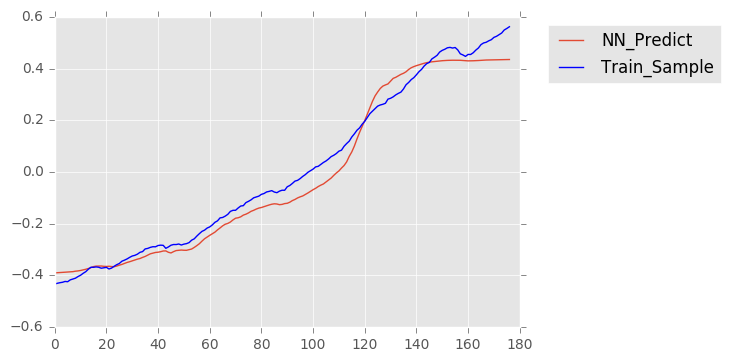

In [204]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

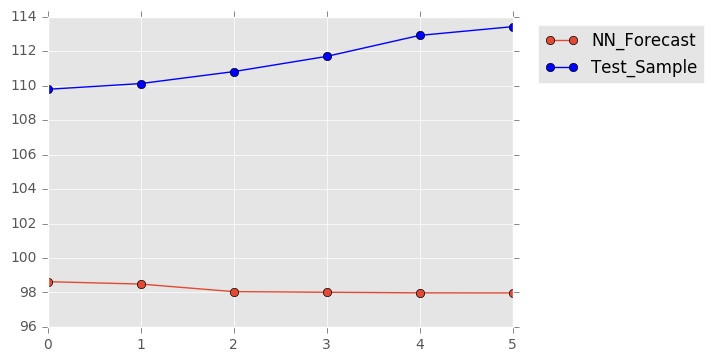

In [205]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [206]:
errors_out_sample(test, nn_forecast)

{'MAE': 13.281189097086589,
 'MSE': 178.90681933374981,
 'RMSE': 13.375605381953738}

### Hybrid

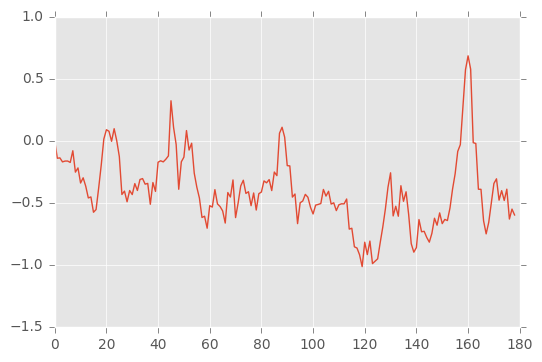

In [207]:
resids_arima = get_resids_arima(train, arima_model, d=1)
plt.plot(resids_arima)
plt.show()

In [208]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 1.4270
Epoch 2/100
0s - loss: 0.5390
Epoch 3/100
0s - loss: 0.4584
Epoch 4/100
0s - loss: 0.3556
Epoch 5/100
0s - loss: 0.2193
Epoch 6/100
0s - loss: 0.2324
Epoch 7/100
0s - loss: 0.2073
Epoch 8/100
0s - loss: 0.1388
Epoch 9/100
0s - loss: 0.1368
Epoch 10/100
0s - loss: 0.0953
Epoch 11/100
0s - loss: 0.0836
Epoch 12/100
0s - loss: 0.0953
Epoch 13/100
0s - loss: 0.0852
Epoch 14/100
0s - loss: 0.0686
Epoch 15/100
0s - loss: 0.0725
Epoch 16/100
0s - loss: 0.0618
Epoch 17/100
0s - loss: 0.0540
Epoch 18/100
0s - loss: 0.0495
Epoch 19/100
0s - loss: 0.0513
Epoch 20/100
0s - loss: 0.0487
Epoch 21/100
0s - loss: 0.0426
Epoch 22/100
0s - loss: 0.0427
Epoch 23/100
0s - loss: 0.0376
Epoch 24/100
0s - loss: 0.0406
Epoch 25/100
0s - loss: 0.0336
Epoch 26/100
0s - loss: 0.0371
Epoch 27/100
0s - loss: 0.0325
Epoch 28/100
0s - loss: 0.0343
Epoch 29/100
0s - loss: 0.0305
Epoch 30/100
0s - loss: 0.0293
Epoch 31/100
0s - loss: 0.0290
Epoch 32/100
0s - loss: 0.0313
Epoch 33/100
0s -

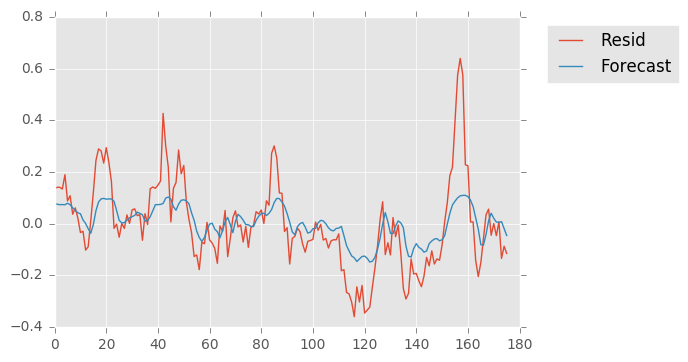

In [209]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [210]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

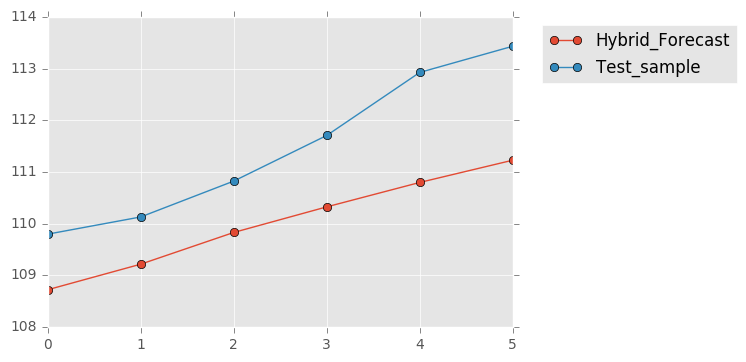

In [211]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [212]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 1.4501718019973187,
 'MSE': 2.3816971188054583,
 'RMSE': 1.5432748033987524}

In [213]:
nn_resids_forecast

array([-0.67624104, -0.64205527, -0.51940167, -0.47375038, -0.42415816,
       -0.39659369], dtype=float32)

---

---

---

# Real Personal Consumption Expenditures by Major Type of Product, Quantity Indexes

# Goods

In [214]:
pers_goods = df.iloc[56, 1:186].copy()
pers_goods.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   1.222984
p-value                          0.996141
#Lags Used                       3.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


Results of KPSS Test:
Test Statistic            1.294143
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


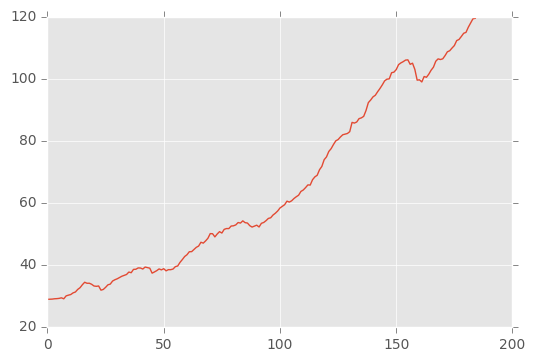

In [215]:
test_stationarity(pers_goods)

Results of Dickey-Fuller Test:
Test Statistic                  -4.720413
p-value                          0.000077
#Lags Used                       2.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


Results of KPSS Test:
Test Statistic            0.450646
p-value                   0.055325
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


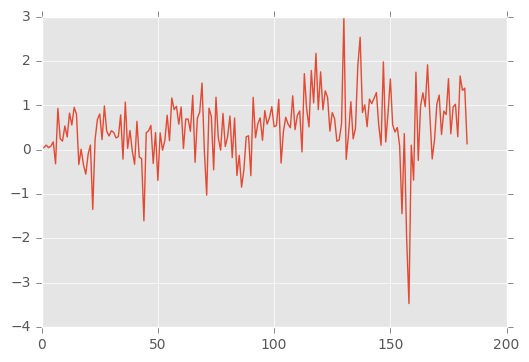

In [216]:
test_stationarity(diff_series(pers_goods))

In [217]:
train = pers_consump_exp[:-6]
test = pers_consump_exp[-6:]

### ARIMA

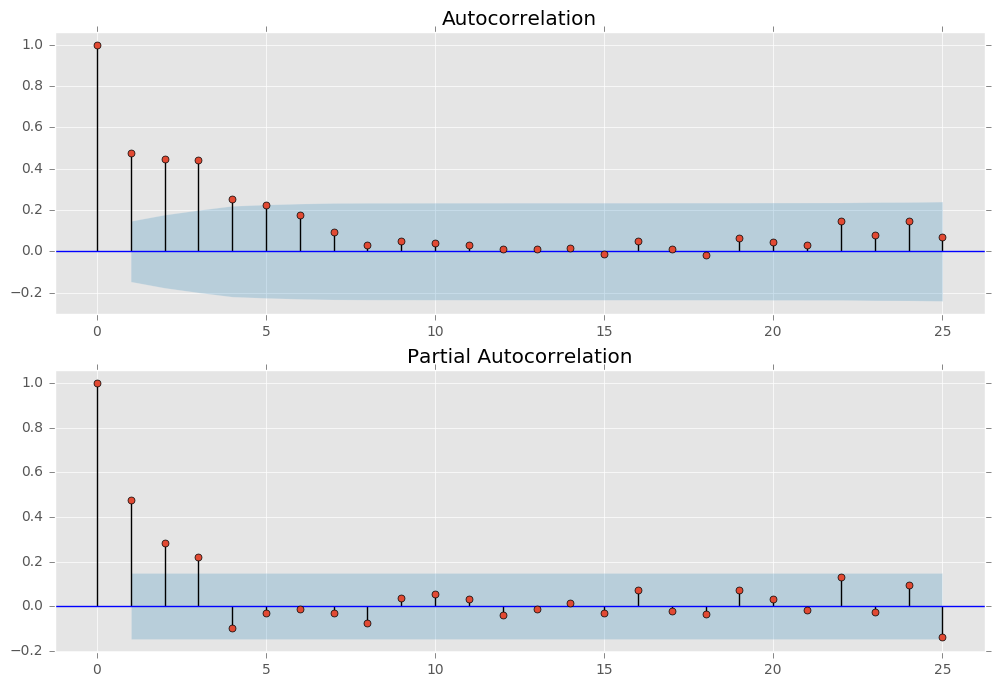

In [218]:
correlogram(diff_series(train))

In [219]:
arima_model = ARIMA(np.array(train), order=(3,1,0)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  178
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -53.056
Method:                       css-mle   S.D. of innovations              0.325
Date:                Tue, 09 May 2017   AIC                            116.112
Time:                        03:17:03   BIC                            132.021
Sample:                             1   HQIC                           122.563
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4474      0.081      5.543      0.000       0.289       0.606
ar.L1.D.y      0.2758      0.073      3.792      0.000       0.133       0.418
ar.L2.D.y      0.2062      0.074      2.786      0.0

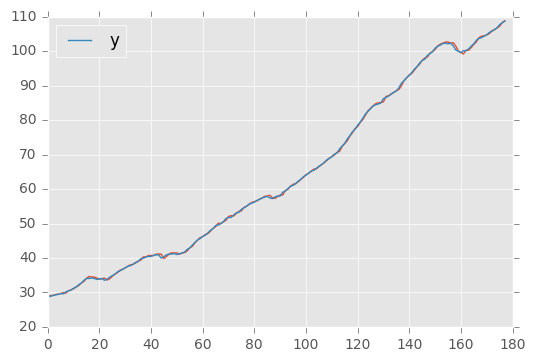

In [220]:
arima_model.plot_predict()
plt.show()

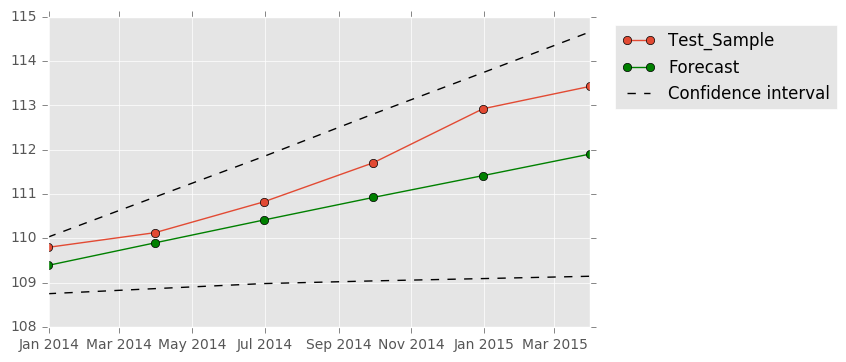

In [221]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [222]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.81134259484241988,
 'MSE': 0.93567778591074247,
 'RMSE': 0.96730439154939352}

---

---

---

### ANN

In [223]:
scaled_train = scaler(train)[0]

lags_for_nn = 3

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1171
Epoch 2/100
0s - loss: 0.1026
Epoch 3/100
0s - loss: 0.1033
Epoch 4/100
0s - loss: 0.1010
Epoch 5/100
0s - loss: 0.1009
Epoch 6/100
0s - loss: 0.0950
Epoch 7/100
0s - loss: 0.0871
Epoch 8/100
0s - loss: 0.0785
Epoch 9/100
0s - loss: 0.0695
Epoch 10/100
0s - loss: 0.0583
Epoch 11/100
0s - loss: 0.0441
Epoch 12/100
0s - loss: 0.0382
Epoch 13/100
0s - loss: 0.0303
Epoch 14/100
0s - loss: 0.0357
Epoch 15/100
0s - loss: 0.0269
Epoch 16/100
0s - loss: 0.0258
Epoch 17/100
0s - loss: 0.0210
Epoch 18/100
0s - loss: 0.0189
Epoch 19/100
0s - loss: 0.0226
Epoch 20/100
0s - loss: 0.0242
Epoch 21/100
0s - loss: 0.0217
Epoch 22/100
0s - loss: 0.0202
Epoch 23/100
0s - loss: 0.0256
Epoch 24/100
0s - loss: 0.0248
Epoch 25/100
0s - loss: 0.0190
Epoch 26/100
0s - loss: 0.0213
Epoch 27/100
0s - loss: 0.0260
Epoch 28/100
0s - loss: 0.0178
Epoch 29/100
0s - loss: 0.0189
Epoch 30/100
0s - loss: 0.0153
Epoch 31/100
0s - loss: 0.0179
Epoch 32/100
0s - loss: 0.0168
Epoch 33/100
0s -

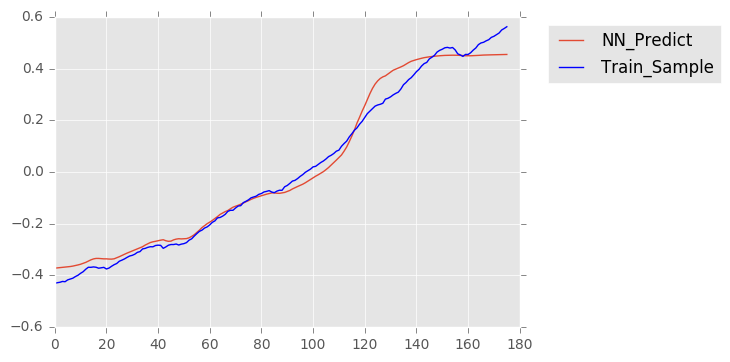

In [224]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

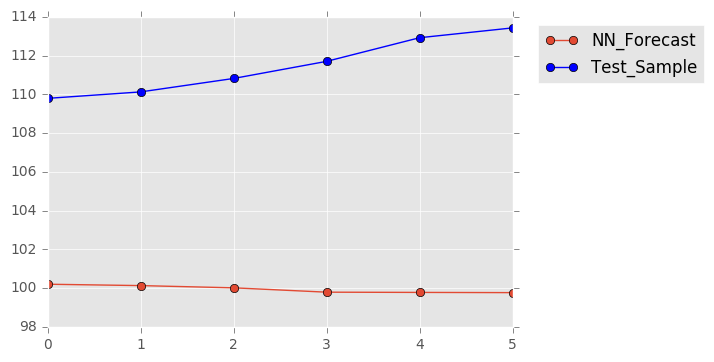

In [225]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [226]:
errors_out_sample(test, nn_forecast)

{'MAE': 11.519593688964845,
 'MSE': 135.02381610738044,
 'RMSE': 11.619974875505559}

### Hybrid

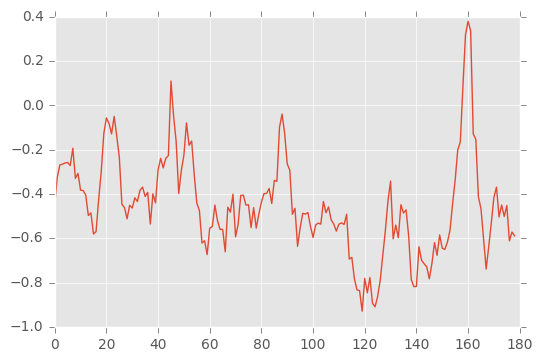

In [227]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [228]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.3982
Epoch 2/100
0s - loss: 0.0660
Epoch 3/100
0s - loss: 0.0524
Epoch 4/100
0s - loss: 0.0420
Epoch 5/100
0s - loss: 0.0421
Epoch 6/100
0s - loss: 0.0375
Epoch 7/100
0s - loss: 0.0338
Epoch 8/100
0s - loss: 0.0302
Epoch 9/100
0s - loss: 0.0318
Epoch 10/100
0s - loss: 0.0322
Epoch 11/100
0s - loss: 0.0296
Epoch 12/100
0s - loss: 0.0294
Epoch 13/100
0s - loss: 0.0278
Epoch 14/100
0s - loss: 0.0292
Epoch 15/100
0s - loss: 0.0291
Epoch 16/100
0s - loss: 0.0294
Epoch 17/100
0s - loss: 0.0290
Epoch 18/100
0s - loss: 0.0294
Epoch 19/100
0s - loss: 0.0284
Epoch 20/100
0s - loss: 0.0288
Epoch 21/100
0s - loss: 0.0302
Epoch 22/100
0s - loss: 0.0294
Epoch 23/100
0s - loss: 0.0265
Epoch 24/100
0s - loss: 0.0270
Epoch 25/100
0s - loss: 0.0279
Epoch 26/100
0s - loss: 0.0259
Epoch 27/100
0s - loss: 0.0262
Epoch 28/100
0s - loss: 0.0271
Epoch 29/100
0s - loss: 0.0270
Epoch 30/100
0s - loss: 0.0280
Epoch 31/100
0s - loss: 0.0245
Epoch 32/100
0s - loss: 0.0260
Epoch 33/100
0s -

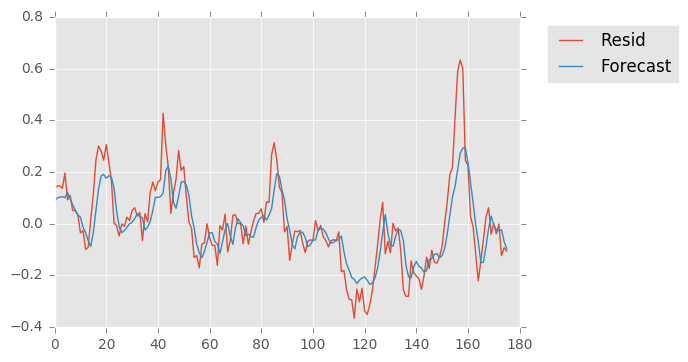

In [229]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [230]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

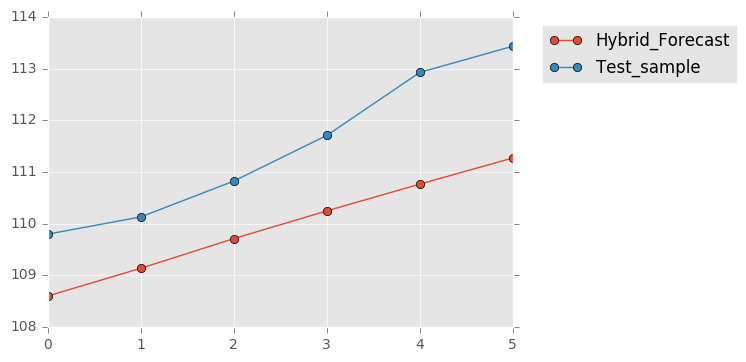

In [231]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [232]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 1.5150066890520908,
 'MSE': 2.5243423237182312,
 'RMSE': 1.5888179013714037}

In [233]:
nn_resids_forecast

array([-0.78902441, -0.76407063, -0.70390058, -0.67827022, -0.65234792,
       -0.6343708 ], dtype=float32)

---

---

---

# Household consumption expenditures (for services)

In [234]:
hh_consump_serv = df.iloc[58, 1:186].copy()
hh_consump_serv.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   0.742798
p-value                          0.990654
#Lags Used                       6.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


Results of KPSS Test:
Test Statistic            1.334034
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


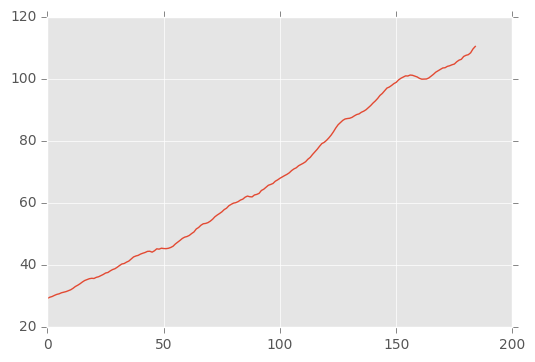

In [235]:
test_stationarity(hh_consump_serv)

Results of Dickey-Fuller Test:
Test Statistic                  -3.408599
p-value                          0.010669
#Lags Used                       5.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


Results of KPSS Test:
Test Statistic            0.22775
p-value                   0.10000
#Lags Used               14.00000
Critical Value (1%)       0.73900
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


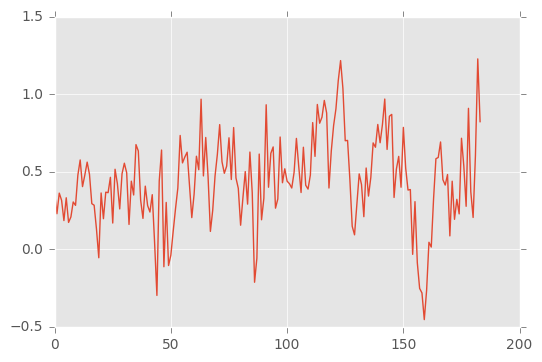

In [236]:
test_stationarity(diff_series(hh_consump_serv))

In [237]:
train = hh_consump_serv[:-6]
test = hh_consump_serv[-6:]

### ARIMA

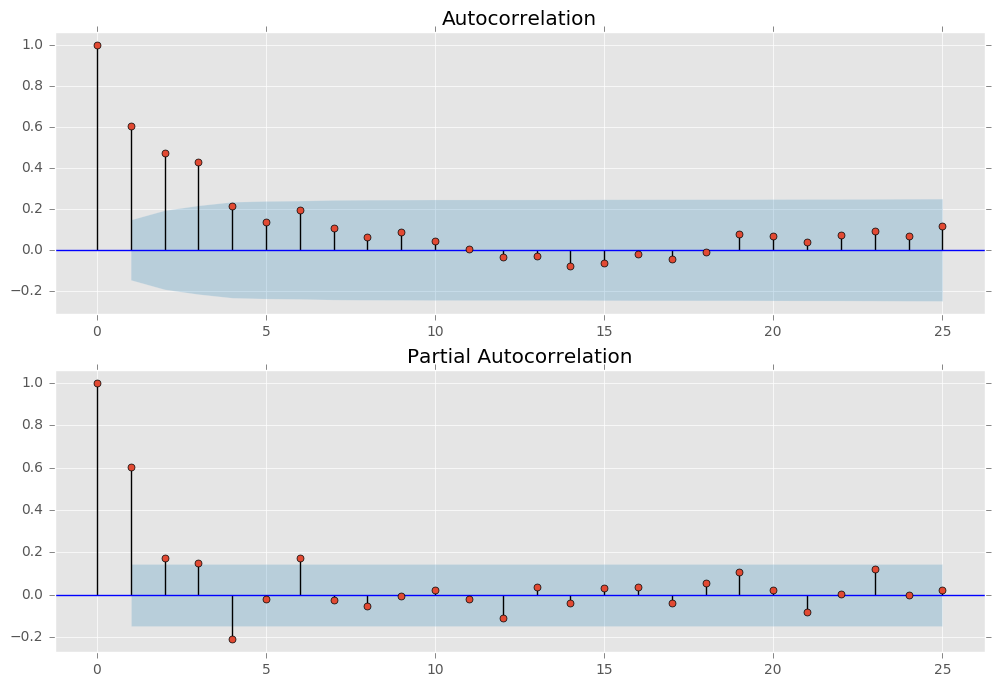

In [238]:
correlogram(diff_series(train))

In [239]:
arima_model = ARIMA(np.array(train), order=(2,1,1)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  178
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  11.427
Method:                       css-mle   S.D. of innovations              0.225
Date:                Tue, 09 May 2017   AIC                            -14.854
Time:                        03:18:02   BIC                             -2.127
Sample:                             1   HQIC                            -9.693
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      1.5445      0.069     22.281      0.000       1.409       1.680
ar.L2.D.y     -0.5456      0.069     -7.961      0.000      -0.680      -0.411
ma.L1.D.y     -0.9484      0.040    -23.828      0.0

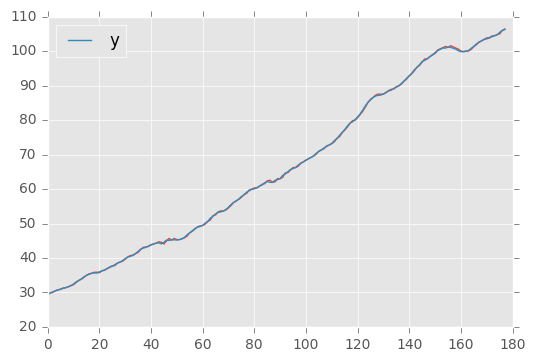

In [240]:
arima_model.plot_predict()
plt.show()

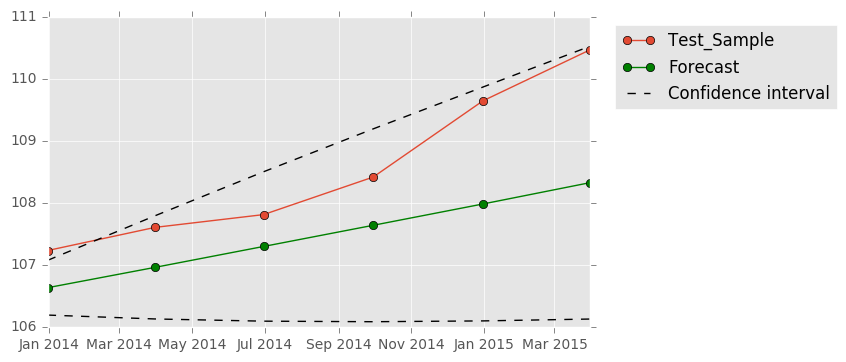

In [241]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [242]:
errors_out_sample(test, forc_arima[0])

{'MAE': 1.0571848972051423,
 'MSE': 1.5008149286429517,
 'RMSE': 1.2250775194423216}

### ANN

In [243]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1610
Epoch 2/100
0s - loss: 0.1185
Epoch 3/100
0s - loss: 0.1157
Epoch 4/100
0s - loss: 0.0981
Epoch 5/100
0s - loss: 0.0999
Epoch 6/100
0s - loss: 0.1030
Epoch 7/100
0s - loss: 0.0995
Epoch 8/100
0s - loss: 0.0880
Epoch 9/100
0s - loss: 0.0946
Epoch 10/100
0s - loss: 0.0800
Epoch 11/100
0s - loss: 0.0734
Epoch 12/100
0s - loss: 0.0754
Epoch 13/100
0s - loss: 0.0630
Epoch 14/100
0s - loss: 0.0591
Epoch 15/100
0s - loss: 0.0486
Epoch 16/100
0s - loss: 0.0460
Epoch 17/100
0s - loss: 0.0347
Epoch 18/100
0s - loss: 0.0328
Epoch 19/100
0s - loss: 0.0294
Epoch 20/100
0s - loss: 0.0299
Epoch 21/100
0s - loss: 0.0269
Epoch 22/100
0s - loss: 0.0291
Epoch 23/100
0s - loss: 0.0319
Epoch 24/100
0s - loss: 0.0240
Epoch 25/100
0s - loss: 0.0187
Epoch 26/100
0s - loss: 0.0262
Epoch 27/100
0s - loss: 0.0215
Epoch 28/100
0s - loss: 0.0226
Epoch 29/100
0s - loss: 0.0250
Epoch 30/100
0s - loss: 0.0226
Epoch 31/100
0s - loss: 0.0252
Epoch 32/100
0s - loss: 0.0172
Epoch 33/100
0s -

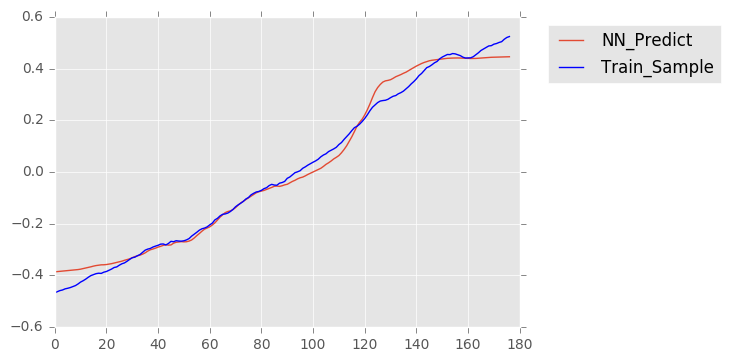

In [244]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

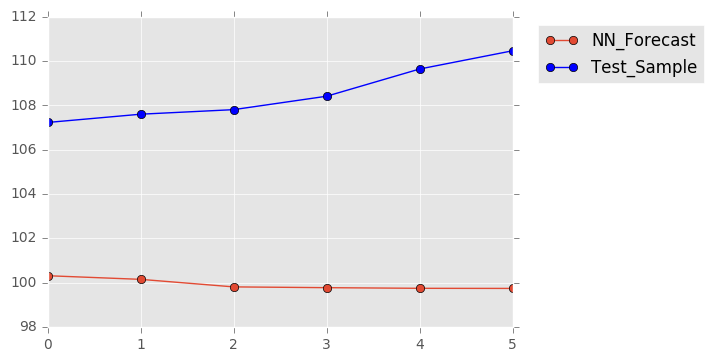

In [245]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [246]:
errors_out_sample(test, nn_forecast)

{'MAE': 8.6110102742513046,
 'MSE': 75.937383338914628,
 'RMSE': 8.7142058352390688}

### Hybrid

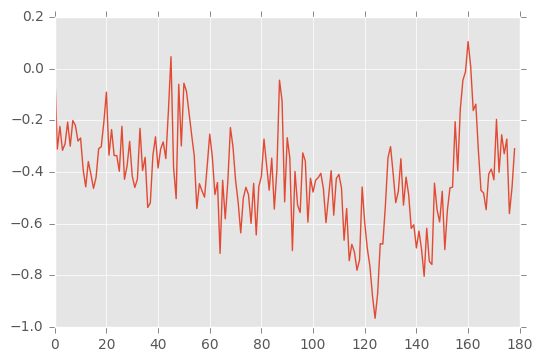

In [247]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [248]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.2324
Epoch 2/100
0s - loss: 0.0420
Epoch 3/100
0s - loss: 0.0430
Epoch 4/100
0s - loss: 0.0343
Epoch 5/100
0s - loss: 0.0414
Epoch 6/100
0s - loss: 0.0352
Epoch 7/100
0s - loss: 0.0326
Epoch 8/100
0s - loss: 0.0340
Epoch 9/100
0s - loss: 0.0307
Epoch 10/100
0s - loss: 0.0314
Epoch 11/100
0s - loss: 0.0323
Epoch 12/100
0s - loss: 0.0309
Epoch 13/100
0s - loss: 0.0307
Epoch 14/100
0s - loss: 0.0300
Epoch 15/100
0s - loss: 0.0293
Epoch 16/100
0s - loss: 0.0300
Epoch 17/100
0s - loss: 0.0297
Epoch 18/100
0s - loss: 0.0297
Epoch 19/100
0s - loss: 0.0306
Epoch 20/100
0s - loss: 0.0285
Epoch 21/100
0s - loss: 0.0289
Epoch 22/100
0s - loss: 0.0281
Epoch 23/100
0s - loss: 0.0266
Epoch 24/100
0s - loss: 0.0289
Epoch 25/100
0s - loss: 0.0298
Epoch 26/100
0s - loss: 0.0270
Epoch 27/100
0s - loss: 0.0272
Epoch 28/100
0s - loss: 0.0282
Epoch 29/100
0s - loss: 0.0280
Epoch 30/100
0s - loss: 0.0277
Epoch 31/100
0s - loss: 0.0290
Epoch 32/100
0s - loss: 0.0261
Epoch 33/100
0s -

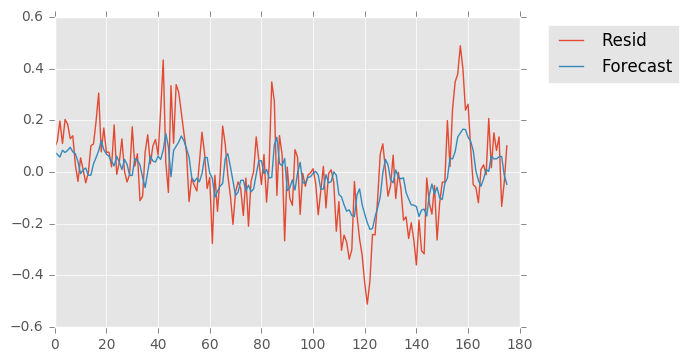

In [249]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [250]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

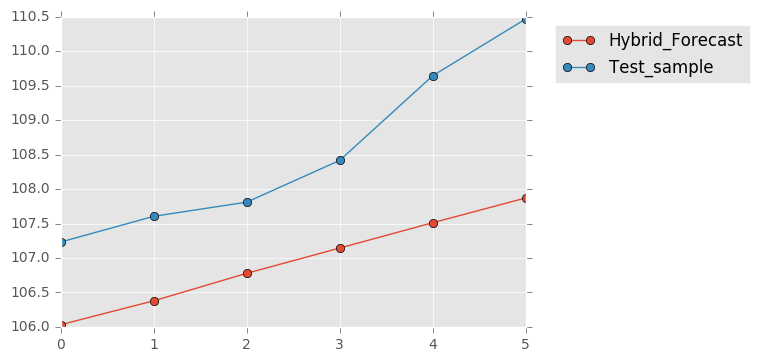

In [251]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [252]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 1.577395873607107,
 'MSE': 2.8226031508755018,
 'RMSE': 1.6800604604821523}

In [253]:
nn_resids_forecast

array([-0.60073966, -0.58145702, -0.51935691, -0.4941721 , -0.47002313,
       -0.45551705], dtype=float32)

---

---

---

# Saving and Investment by Sector

In [254]:
sav_inv_sec = df.iloc[63, 1:186].copy()
sav_inv_sec.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   1.153398
p-value                          0.995648
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


Results of KPSS Test:
Test Statistic            1.325475
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


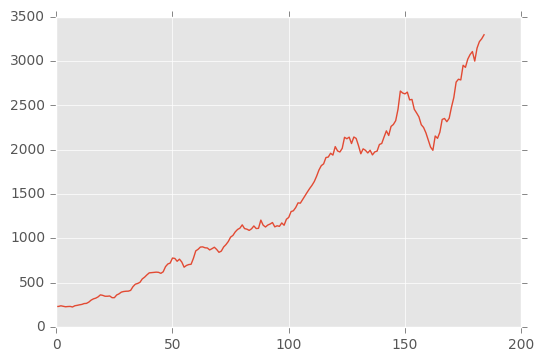

In [255]:
test_stationarity(sav_inv_sec)

Results of Dickey-Fuller Test:
Test Statistic                  -4.325188
p-value                          0.000402
#Lags Used                       3.000000
Number of Observations Used    180.000000
Critical Value (1%)             -3.467211
Critical Value (5%)             -2.877735
Critical Value (10%)            -2.575403
dtype: float64


Results of KPSS Test:
Test Statistic            0.191004
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


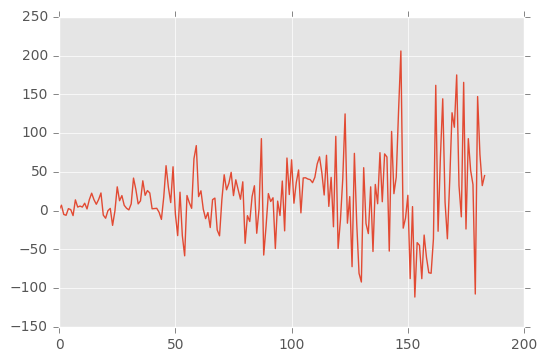

In [256]:
test_stationarity(diff_series(sav_inv_sec))

In [257]:
train = sav_inv_sec[:-6]
test = sav_inv_sec[-6:]

### ARIMA

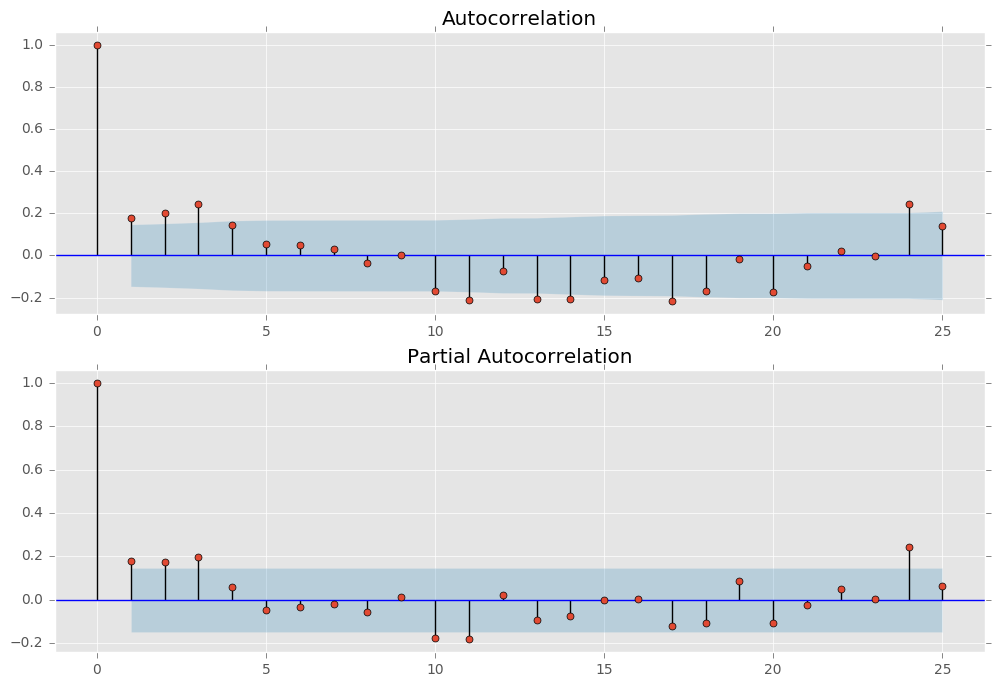

In [258]:
correlogram(diff_series(train))

In [259]:
arima_model = ARIMA(np.array(train), order=(1,1,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  178
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -938.727
Method:                       css-mle   S.D. of innovations             47.202
Date:                Tue, 09 May 2017   AIC                           1885.454
Time:                        03:18:57   BIC                           1898.181
Sample:                             1   HQIC                          1890.615
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3547      6.544      2.499      0.013       3.528      29.181
ar.L1.D.y      0.7966      0.090      8.865      0.000       0.621       0.973
ma.L1.D.y     -0.6193      0.106     -5.840      0.0

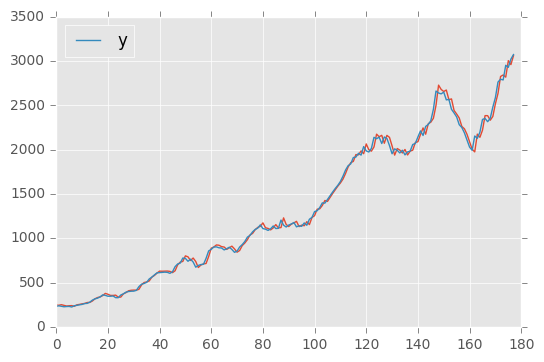

In [260]:
arima_model.plot_predict()
plt.show()

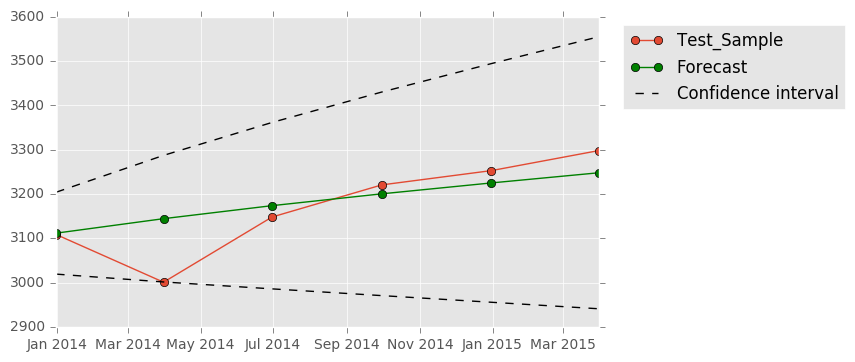

In [261]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [262]:
errors_out_sample(test, forc_arima[0])

{'MAE': 45.050682668100229,
 'MSE': 4156.2018698527945,
 'RMSE': 64.468611508646546}

### ANN

In [263]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1642
Epoch 2/100
0s - loss: 0.1080
Epoch 3/100
0s - loss: 0.0951
Epoch 4/100
0s - loss: 0.0873
Epoch 5/100
0s - loss: 0.0835
Epoch 6/100
0s - loss: 0.0780
Epoch 7/100
0s - loss: 0.0737
Epoch 8/100
0s - loss: 0.0803
Epoch 9/100
0s - loss: 0.0711
Epoch 10/100
0s - loss: 0.0708
Epoch 11/100
0s - loss: 0.0698
Epoch 12/100
0s - loss: 0.0664
Epoch 13/100
0s - loss: 0.0623
Epoch 14/100
0s - loss: 0.0535
Epoch 15/100
0s - loss: 0.0451
Epoch 16/100
0s - loss: 0.0391
Epoch 17/100
0s - loss: 0.0383
Epoch 18/100
0s - loss: 0.0343
Epoch 19/100
0s - loss: 0.0284
Epoch 20/100
0s - loss: 0.0279
Epoch 21/100
0s - loss: 0.0270
Epoch 22/100
0s - loss: 0.0273
Epoch 23/100
0s - loss: 0.0180
Epoch 24/100
0s - loss: 0.0216
Epoch 25/100
0s - loss: 0.0225
Epoch 26/100
0s - loss: 0.0223
Epoch 27/100
0s - loss: 0.0163
Epoch 28/100
0s - loss: 0.0189
Epoch 29/100
0s - loss: 0.0203
Epoch 30/100
0s - loss: 0.0187
Epoch 31/100
0s - loss: 0.0118
Epoch 32/100
0s - loss: 0.0169
Epoch 33/100
0s -

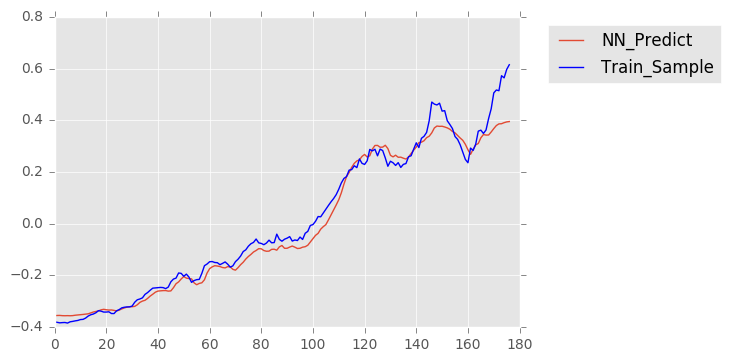

In [264]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

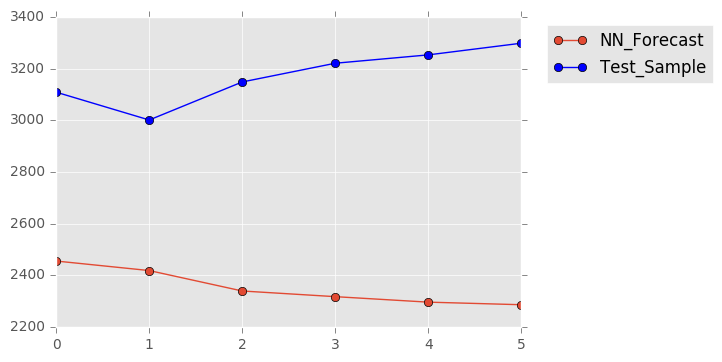

In [265]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [266]:
errors_out_sample(test, nn_forecast)

{'MAE': 819.75698242187502,
 'MSE': 696472.99071588519,
 'RMSE': 834.54957355203601}

### Hybrid

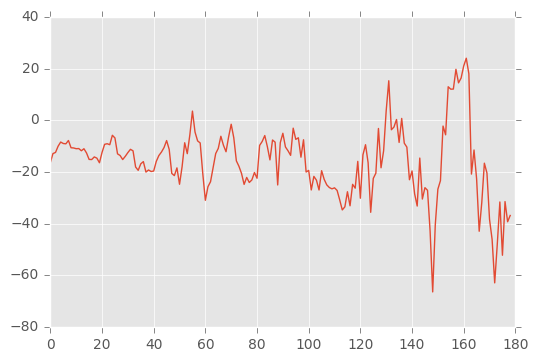

In [267]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [268]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.5598
Epoch 2/100
0s - loss: 0.4438
Epoch 3/100
0s - loss: 0.3490
Epoch 4/100
0s - loss: 0.2010
Epoch 5/100
0s - loss: 0.2000
Epoch 6/100
0s - loss: 0.1311
Epoch 7/100
0s - loss: 0.1269
Epoch 8/100
0s - loss: 0.0973
Epoch 9/100
0s - loss: 0.0885
Epoch 10/100
0s - loss: 0.0659
Epoch 11/100
0s - loss: 0.0629
Epoch 12/100
0s - loss: 0.0408
Epoch 13/100
0s - loss: 0.0561
Epoch 14/100
0s - loss: 0.0456
Epoch 15/100
0s - loss: 0.0418
Epoch 16/100
0s - loss: 0.0376
Epoch 17/100
0s - loss: 0.0349
Epoch 18/100
0s - loss: 0.0302
Epoch 19/100
0s - loss: 0.0283
Epoch 20/100
0s - loss: 0.0319
Epoch 21/100
0s - loss: 0.0287
Epoch 22/100
0s - loss: 0.0264
Epoch 23/100
0s - loss: 0.0255
Epoch 24/100
0s - loss: 0.0257
Epoch 25/100
0s - loss: 0.0240
Epoch 26/100
0s - loss: 0.0248
Epoch 27/100
0s - loss: 0.0264
Epoch 28/100
0s - loss: 0.0244
Epoch 29/100
0s - loss: 0.0246
Epoch 30/100
0s - loss: 0.0239
Epoch 31/100
0s - loss: 0.0255
Epoch 32/100
0s - loss: 0.0237
Epoch 33/100
0s -

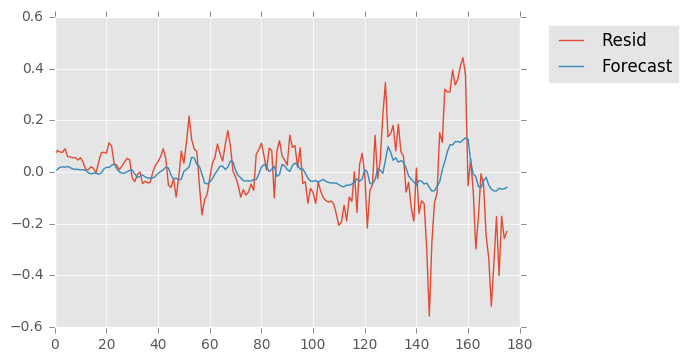

In [269]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [270]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

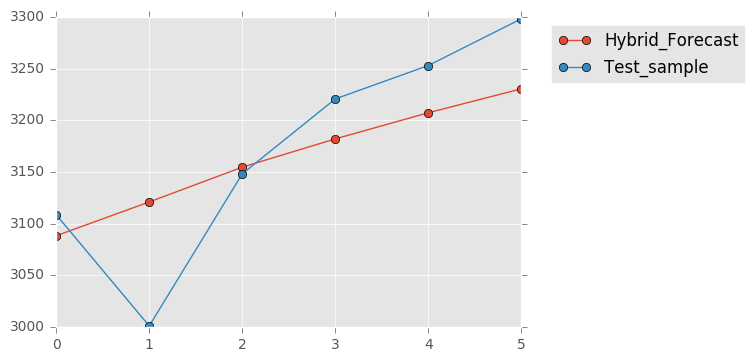

In [271]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [272]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 49.811788252819269,
 'MSE': 3837.9578810643538,
 'RMSE': 61.951254071764794}

In [273]:
nn_resids_forecast

array([-23.4624939 , -23.46266747, -19.1817379 , -18.54386902,
       -17.8754406 , -17.66848564], dtype=float32)

---

---

---

# GDP in billions of current dollars  (Seasonally adjusted annual rates)

In [274]:
US_GDP = df.iloc[67, 1:274].copy()
US_GDP.index = pd.DatetimeIndex(start='1947-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   3.354483
p-value                          1.000000
#Lags Used                      11.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


Results of KPSS Test:
Test Statistic            1.551114
p-value                   0.010000
#Lags Used               16.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


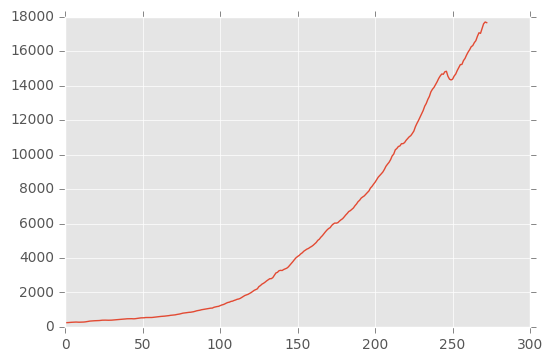

In [275]:
test_stationarity(US_GDP)

Results of Dickey-Fuller Test:
Test Statistic                  -1.720379
p-value                          0.420644
#Lags Used                      16.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


Results of KPSS Test:
Test Statistic            1.471675
p-value                   0.010000
#Lags Used               16.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


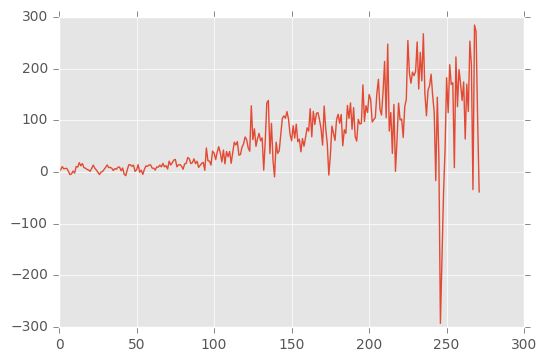

In [276]:
test_stationarity(diff_series(US_GDP))

Results of Dickey-Fuller Test:
Test Statistic                -6.915610e+00
p-value                        1.181648e-09
#Lags Used                     1.400000e+01
Number of Observations Used    2.560000e+02
Critical Value (1%)           -3.456155e+00
Critical Value (5%)           -2.872897e+00
Critical Value (10%)          -2.572822e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.094653
p-value                   0.100000
#Lags Used               16.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


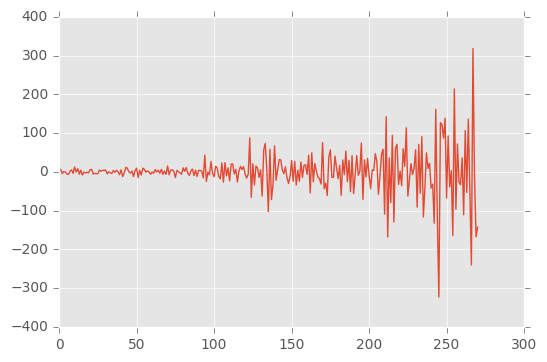

In [277]:
test_stationarity(diff_series(diff_series(US_GDP)))

In [278]:
train = US_GDP[:-6]
test = US_GDP[-6:]

### ARIMA

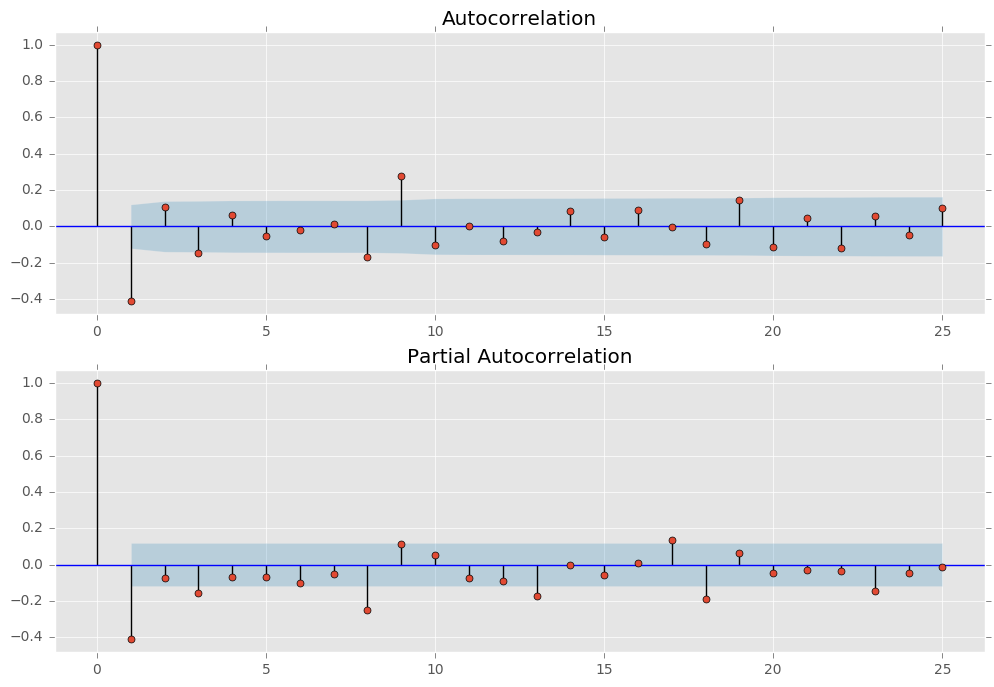

In [279]:
correlogram(diff_series(diff_series(train)))

In [280]:
arima_model = ARIMA(np.array(train), order=(2,2,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  265
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1375.805
Method:                       css-mle   S.D. of innovations             43.165
Date:                Tue, 09 May 2017   AIC                           2761.610
Time:                        03:19:54   BIC                           2779.509
Sample:                             2   HQIC                          2768.801
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6174      0.085      7.229      0.000       0.450       0.785
ar.L1.D2.y     0.3819      0.061      6.277      0.000       0.263       0.501
ar.L2.D2.y     0.2238      0.061      3.678      0.0

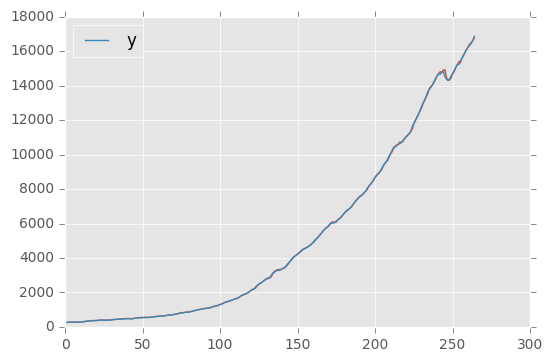

In [281]:
arima_model.plot_predict()
plt.show()

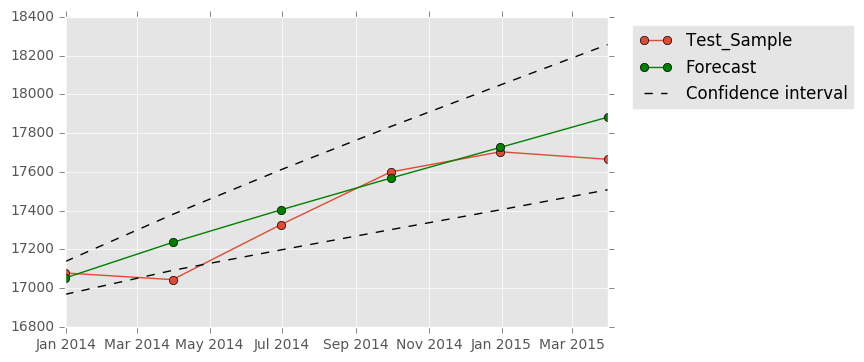

In [282]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

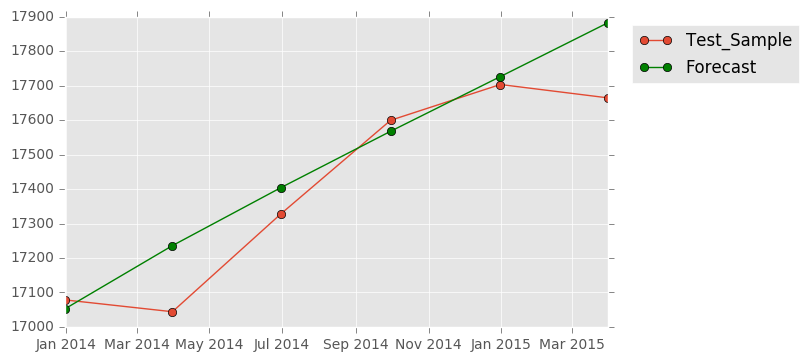

In [283]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1), conf_int=False)

In [284]:
errors_out_sample(test, forc_arima[0])

{'MAE': 94.337055859769563,
 'MSE': 15359.266188547519,
 'RMSE': 123.93250658542946}

### ANN

In [285]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0936
Epoch 2/100
0s - loss: 0.0870
Epoch 3/100
0s - loss: 0.0783
Epoch 4/100
0s - loss: 0.0594
Epoch 5/100
0s - loss: 0.0319
Epoch 6/100
0s - loss: 0.0090
Epoch 7/100
0s - loss: 0.0019
Epoch 8/100
0s - loss: 0.0011
Epoch 9/100
0s - loss: 9.7855e-04
Epoch 10/100
0s - loss: 8.0069e-04
Epoch 11/100
0s - loss: 7.1752e-04
Epoch 12/100
0s - loss: 6.3585e-04
Epoch 13/100
0s - loss: 5.5460e-04
Epoch 14/100
0s - loss: 5.2605e-04
Epoch 15/100
0s - loss: 4.8366e-04
Epoch 16/100
0s - loss: 4.4668e-04
Epoch 17/100
0s - loss: 4.3939e-04
Epoch 18/100
0s - loss: 4.4070e-04
Epoch 19/100
0s - loss: 4.1022e-04
Epoch 20/100
0s - loss: 4.1776e-04
Epoch 21/100
0s - loss: 4.1443e-04
Epoch 22/100
0s - loss: 3.8819e-04
Epoch 23/100
0s - loss: 3.6697e-04
Epoch 24/100
0s - loss: 3.6070e-04
Epoch 25/100
0s - loss: 3.5055e-04
Epoch 26/100
0s - loss: 3.6131e-04
Epoch 27/100
0s - loss: 3.8657e-04
Epoch 28/100
0s - loss: 3.4344e-04
Epoch 29/100
0s - loss: 3.2823e-04
Epoch 30/100
0s - loss: 3.

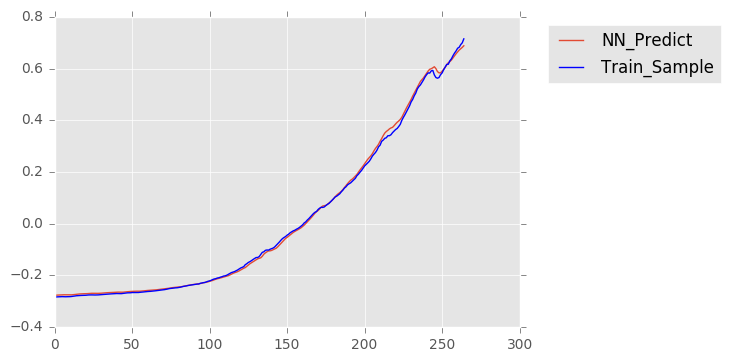

In [286]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

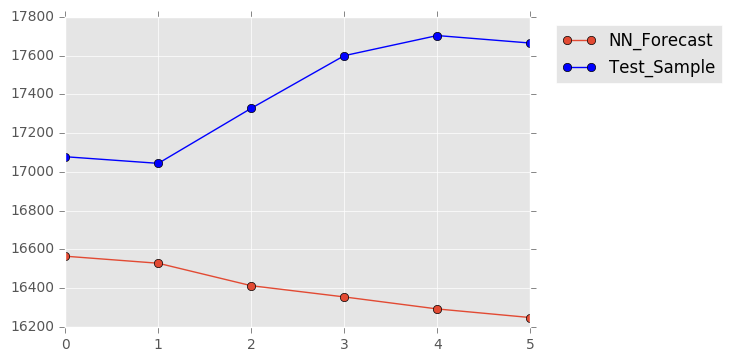

In [287]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [288]:
errors_out_sample(test, nn_forecast)

{'MAE': 1002.9073893229166,
 'MSE': 1152713.0632539049,
 'RMSE': 1073.6447565437577}

### Hybrid

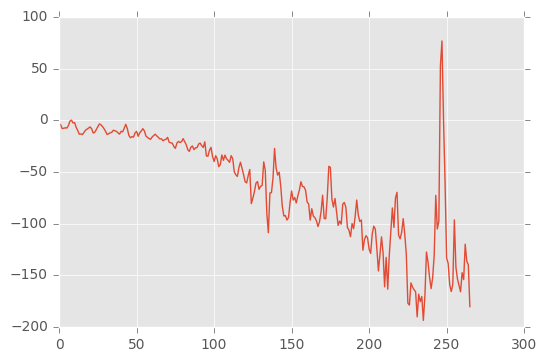

In [289]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [290]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.0489
Epoch 2/100
0s - loss: 0.0441
Epoch 3/100
0s - loss: 0.0401
Epoch 4/100
0s - loss: 0.0396
Epoch 5/100
0s - loss: 0.0387
Epoch 6/100
0s - loss: 0.0386
Epoch 7/100
0s - loss: 0.0387
Epoch 8/100
0s - loss: 0.0387
Epoch 9/100
0s - loss: 0.0389
Epoch 10/100
0s - loss: 0.0381
Epoch 11/100
0s - loss: 0.0369
Epoch 12/100
0s - loss: 0.0372
Epoch 13/100
0s - loss: 0.0361
Epoch 14/100
0s - loss: 0.0331
Epoch 15/100
0s - loss: 0.0301
Epoch 16/100
0s - loss: 0.0247
Epoch 17/100
0s - loss: 0.0234
Epoch 18/100
0s - loss: 0.0204
Epoch 19/100
0s - loss: 0.0206
Epoch 20/100
0s - loss: 0.0176
Epoch 21/100
0s - loss: 0.0160
Epoch 22/100
0s - loss: 0.0178
Epoch 23/100
0s - loss: 0.0142
Epoch 24/100
0s - loss: 0.0143
Epoch 25/100
0s - loss: 0.0133
Epoch 26/100
0s - loss: 0.0150
Epoch 27/100
0s - loss: 0.0127
Epoch 28/100
0s - loss: 0.0163
Epoch 29/100
0s - loss: 0.0120
Epoch 30/100
0s - loss: 0.0125
Epoch 31/100
0s - loss: 0.0124
Epoch 32/100
0s - loss: 0.0128
Epoch 33/100
0s -

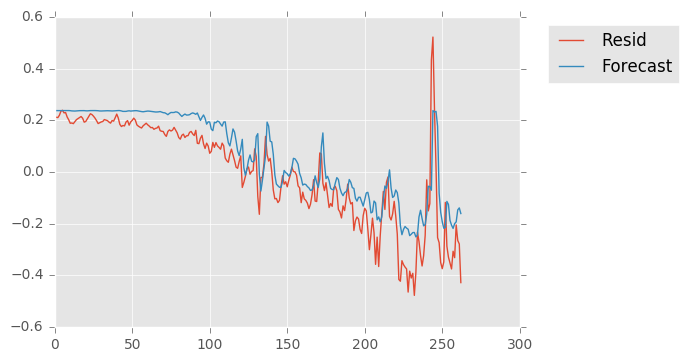

In [291]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [292]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

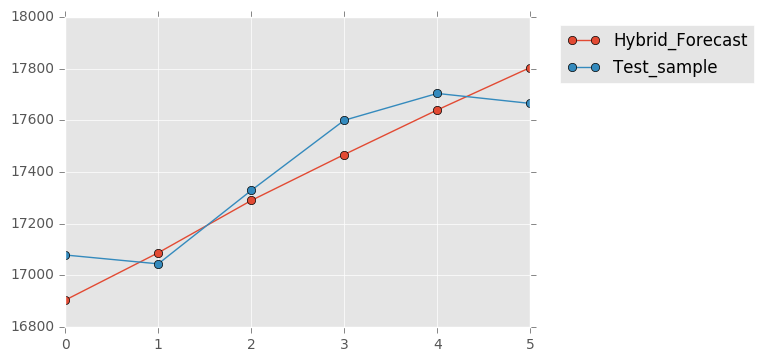

In [293]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [294]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 98.683650106214671,
 'MSE': 12475.367833197199,
 'RMSE': 111.69318615384377}

In [295]:
nn_resids_forecast

array([-148.97290039, -148.97290039, -115.06676483, -100.75582886,
        -86.84494019,  -78.59681702], dtype=float32)